UFRJ/COPPE/PEE<br>
COC800 Data Mining - Trabalho Final<br>
Alunos: Gustavo Martins da Silva Nunes e Michel Morais Ferreira<br>
Prof:   Alexandre G. Evsukoff

# Census Income Dataset

## Introdução
<div align="justify">
Este notebook apresenta o desenvolvimento da análise de dados realizada para o trabalho final da disciplina COC800 Data Mining no período letivo de 2018/1. 
</div>

### Apresentação do Problema
<div align="justify">
A base de dados [Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) é um subconjunto dos dados obtidos no censo demográfico realizado nos Estados Unidos no ano de 1994[1]. O dataset a ser estudado possui 15 variáveis das 40 utilizadas no conjunto de dados do censo realizado[2], sendo 14 destas variáveis informações sobre a população, tais como idade, raça, profissão, horas de trabalho por semana entre outras, e uma variável que representa se o cidadão recebe anualmente mais de \$50.000 dólares ao ano ou não. A tarefa a ser realizada no estudo desse conjunto de dados é a tarefa de classificação dos cidadãos em duas classes: cidadãos com ganhos anuais iguais ou superiores a $50.000 por ano, ou cidadãos com ganhos inferiores a este. 
  
A escolha por este dataset foi motivada devido à variedade de informações a serem tratadas, tais como dados faltantes e a necessidade do tratamento de variáveis mistas(variáveis contínuas e variáveis categóricas), além do extenso número de artigos que foram escritos utilizando esta base de dados como base de comparação de performance de algoritmos de diversos modelos de aprendizado de máquinas.
</div>

### Objetivo
<div align="justify">
O trabalho tem como objetivo utilizar os modelos estudados durante o curso para classificarmos com a maior acurácia possível os cidadãos nos dois grupos de renda citados anteriormente. Após o treinamento dos modelos, será feita a comparação entre a performance dos modelos.
</div>

### Análise Caracterização e Visualização de Dados
<div align="justify">
Será realizada a análise exploratória dos dados para a averiguação dos dados e compreensão dos mesmos. A fase de exploração de dados será decisiva para a construção de um modelo consistente para a classificação correta pro das classes do problema. Durante a análise exploratória, serão verificados os itens exigidos para o projeto:
</div>

- estatísticas básicas exigidas: Mínimos, máximos, médias, desvios padrões, etcs; <br>
- Avaliação de histogramas e características das variáveis; <br>
- Verificação da existência de outliers; <br>
- Verificação da correlação entre as variáveis. <br>
 
Após a fase de caracterização e visualização de dados exigida pelos requisitos do trabalho, será realizado o pré-processamento dos dados, a fim de adequar os dados para o treinamento dos modelos de aprendizado de máquinas. 
</div>

## Análise Exploratória dos Dados

In [223]:
# Importanto os módulos necessários para o processamento dos dados
import numpy   as np
import pandas  as pd

# Módulos necessários para visualização dos dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# O arquivo de dados não possui headers; Incluir uma lista de nomes das features
features = ['age','workclass','fnlwgt','education','education-num','marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','earnings']

# Importando os dados do dataset
training_data = pd.read_csv('Data/train.txt',names=features,index_col=False)
test_data = pd.read_csv('Data/test.txt',names=features,index_col=False)

# União do dataset
data = pd.concat([training_data,test_data],ignore_index=True)

In [224]:
len_training, len_test = len(training_data)/len(data), len(test_data)/len(data)
print('Porcentagem do conjunto de treinamento: {:.2f}\nPorcentagem do conjunto de teste: {:.2f}'.format(len_training,len_test))

Porcentagem do conjunto de treinamento: 0.67
Porcentagem do conjunto de teste: 0.33


### Verificação inicial do conjunto de dados

Utilizando gráficos simples, este contato inicial com os dados do problema nos ajuda a entender melhor os dados, assim como incentivar quais perguntas devemos nos fazer em relação às informações presentes.

In [225]:
# Verificando alguns exemplos da base
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [226]:
# Verificando os tipos de dados presentes
print(data.dtypes)

age                object
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
earnings           object
dtype: object


Por algum motivo, a feature <i>age</i> é considerada object, quando deveria ser considerada float64. Possivelmente alguma entrada pode ter sido escrita como string.

In [227]:
# Verificando a feature age
data.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, '|1x3 Cross validator', '25', '38', '28', '44',
       '18', '34', '29', '63', '24', '55', '65', '36', '26', '58', '48',
       '43', '20', '37', '40', '72', '45', '22', '23', '54', '32', '46',
       '56', '17', '39', '52', '21', '42', '33', '30', '47', '41', '19',
       '69', '50', '31', '59', '49', '51', '27', '57', '61', '64', '79',
       '73', '53', '77', '80', '62', '35', '68', '66', '75', '60', '67',
       '71', '70', '90', '81', '74', '78', '82', '83', '85', '76', '84',
       '89', '88', '87'], dtype=object)

Como esperando, havia uma instância na base com a idade preenchida de forma incorreta, e números inseridos como strings. Removendo o exemplo preenchido incorretamente:

In [228]:
# Verificando a instância com erro
index = data[data.age == '|1x3 Cross validator'].index[0]

# Removendo-a da base
data.drop(index,inplace=True)

In [229]:
# Convertendo strings em números
data.age = data.age.astype(float)

In [230]:
# Verificando novamente os tipos presentes de variáveis
print(data.dtypes)

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
earnings           object
dtype: object


In [231]:
print('Quantidade de exemplos presentes no dataset: {}\nQuantidade de features presentes: {}'.format(*data.shape))

Quantidade de exemplos presentes no dataset: 48842
Quantidade de features presentes: 15


##### Estatísticas do conjunto de dados

In [232]:
# Estatísticas relacionadas às variáveis contínuas (float64)
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [233]:
data.fnlwgt.min(), data.fnlwgt.max()

(12285.0, 1490400.0)

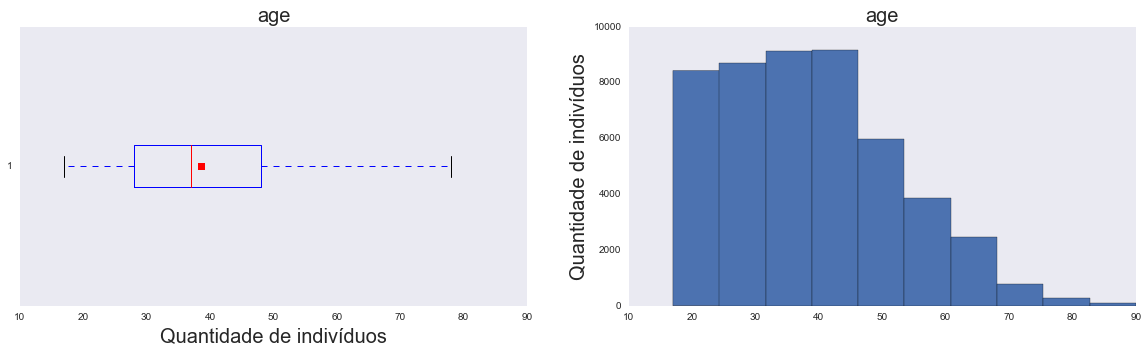

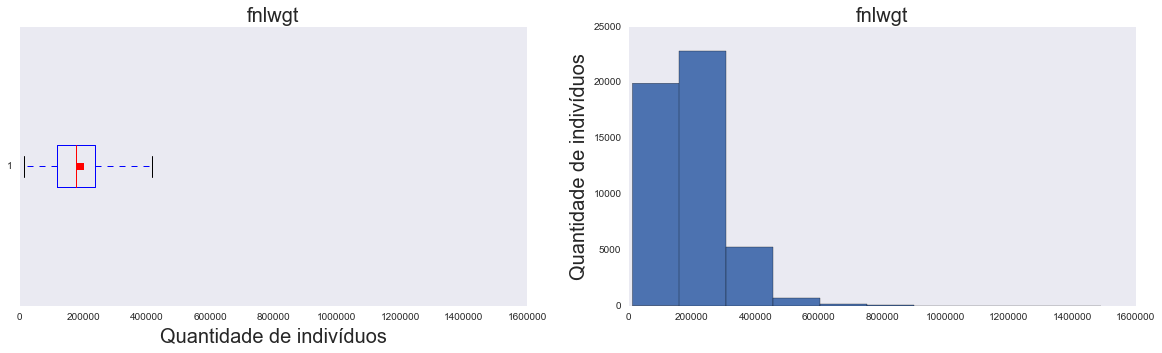

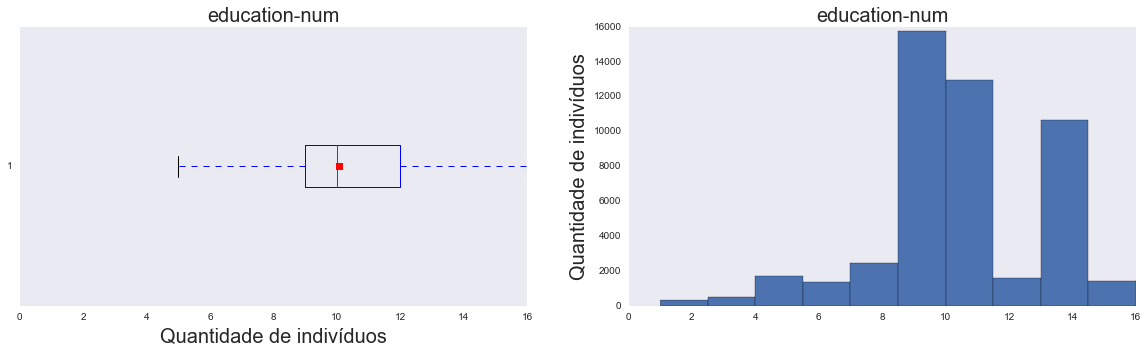

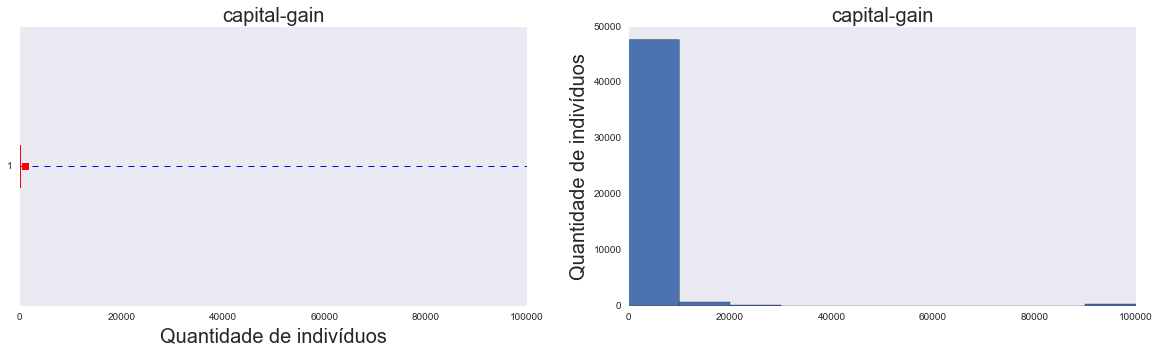

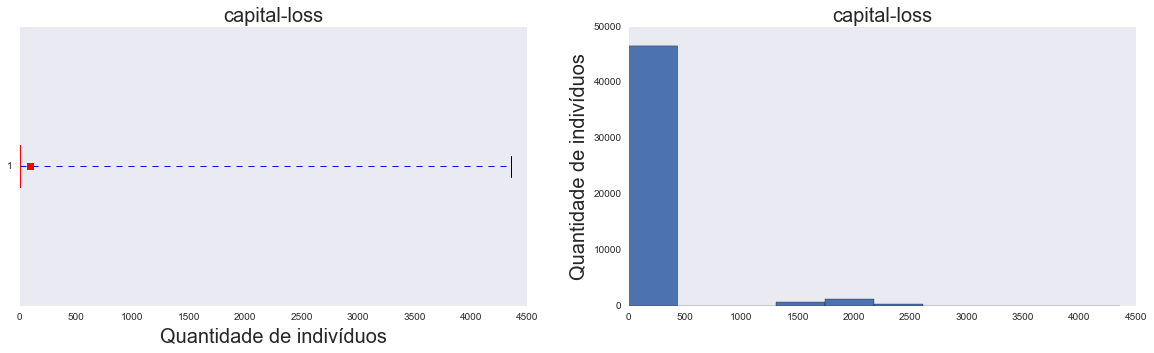

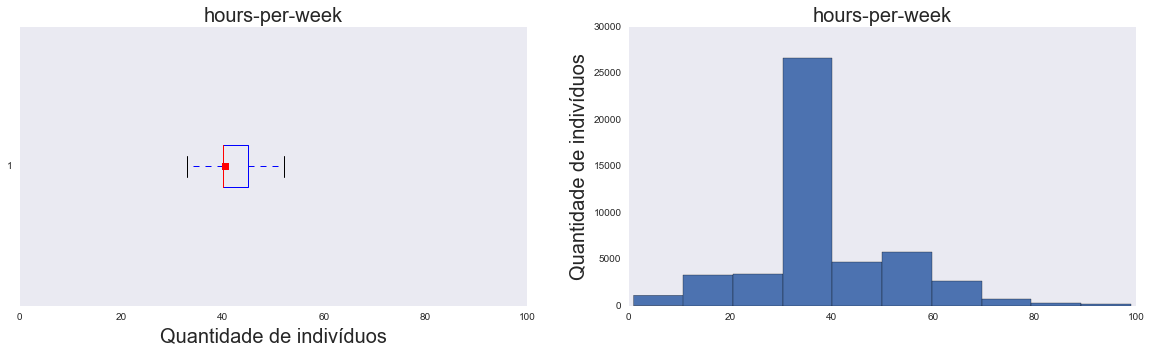

In [12]:
# Visualização das features numéricas

for feature in list(data.select_dtypes(include=['float64']).columns):
    # Configuração dos plots
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.title(feature,fontsize=20)
    plt.xlabel('Quantidade de indivíduos',fontsize=20)
    plt.boxplot(data[feature],showmeans=True,vert=False)
    plt.grid()
    
    plt.subplot(122)
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    plt.hist(data[feature])
    plt.grid()
    
plt.show()

##### Estatísticas relacionadas às variáveis categóricas (Binárias, Nominais e Ordinais)

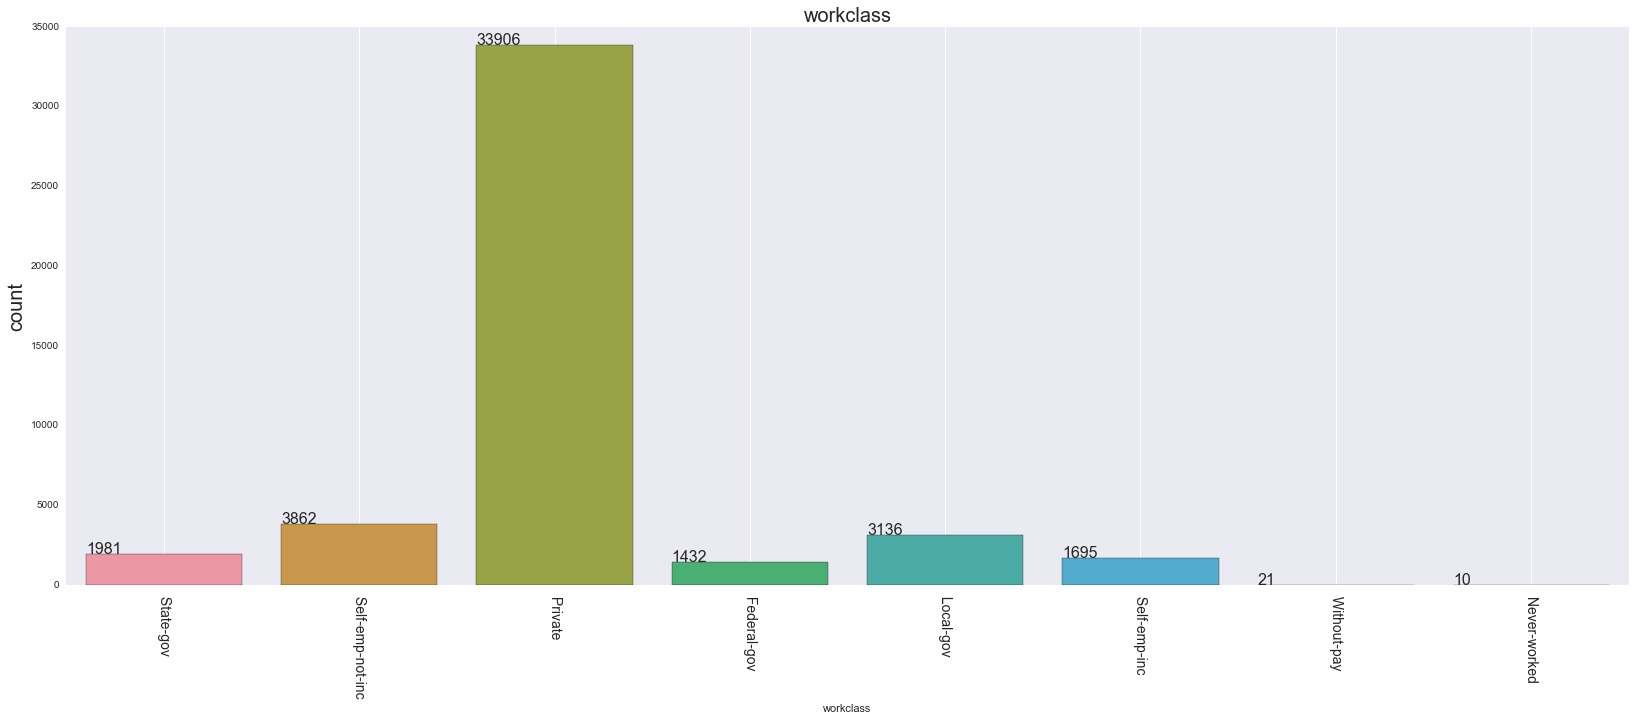

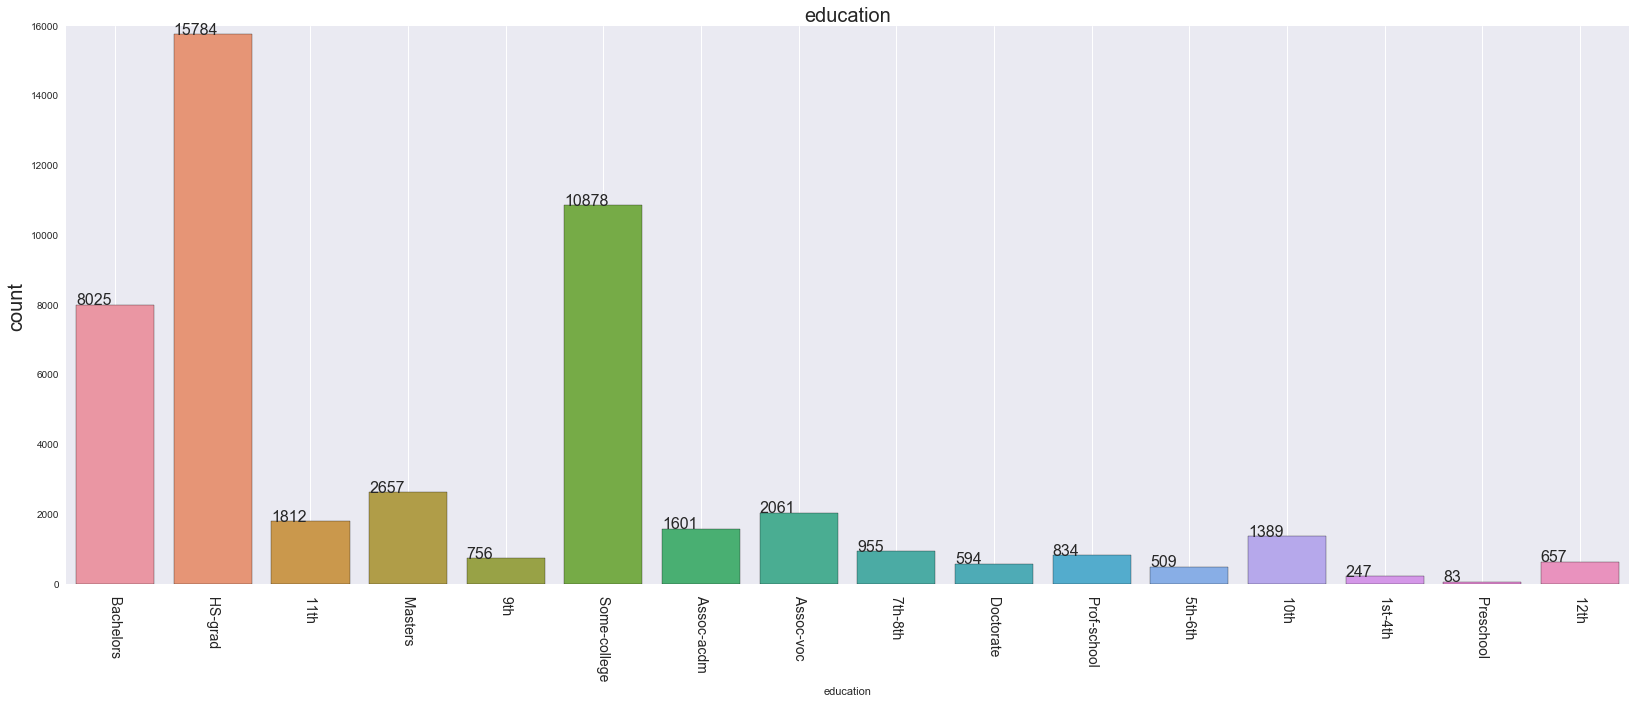

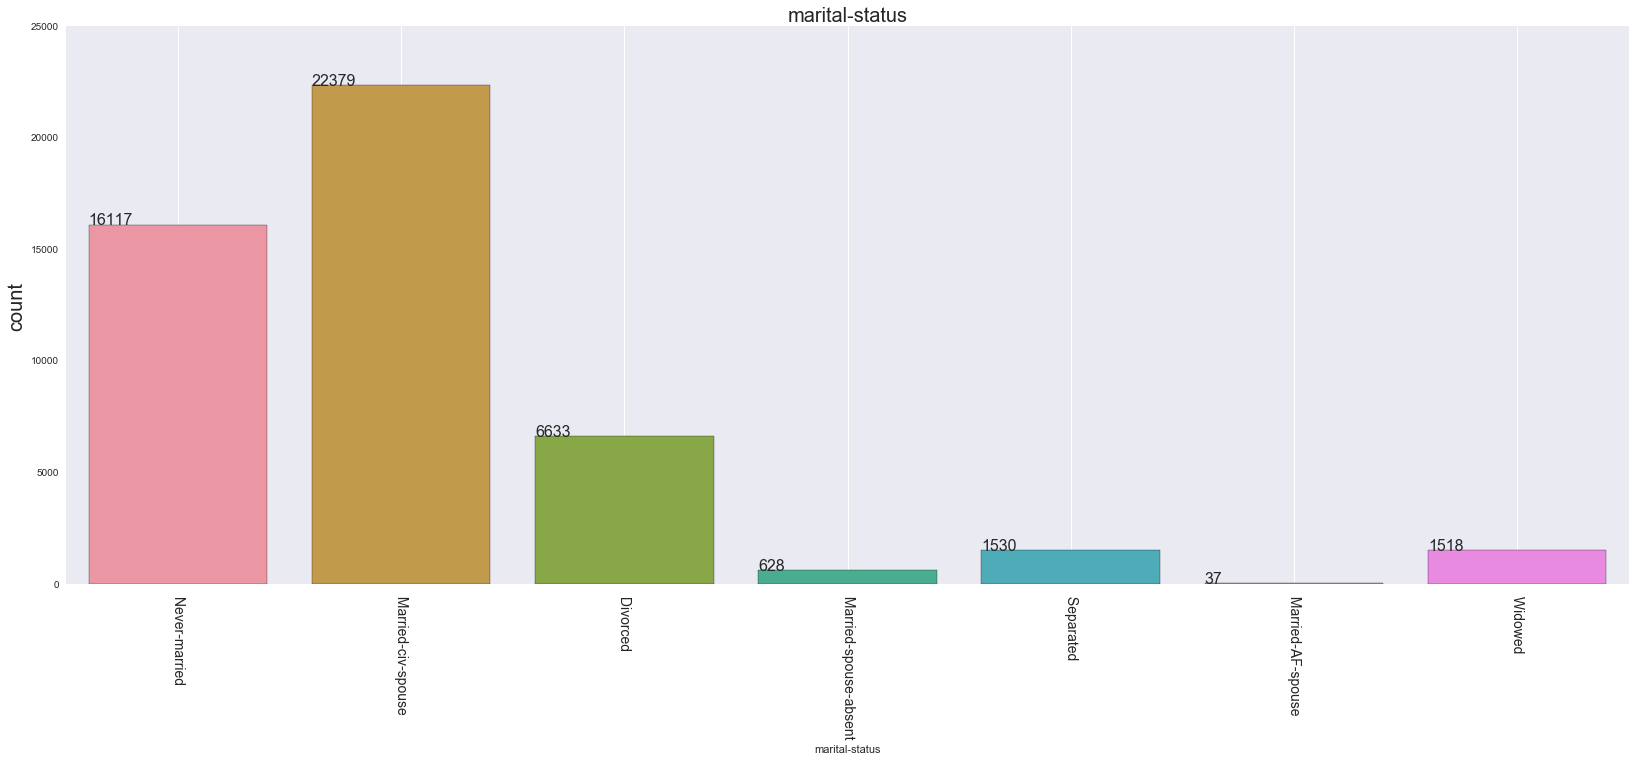

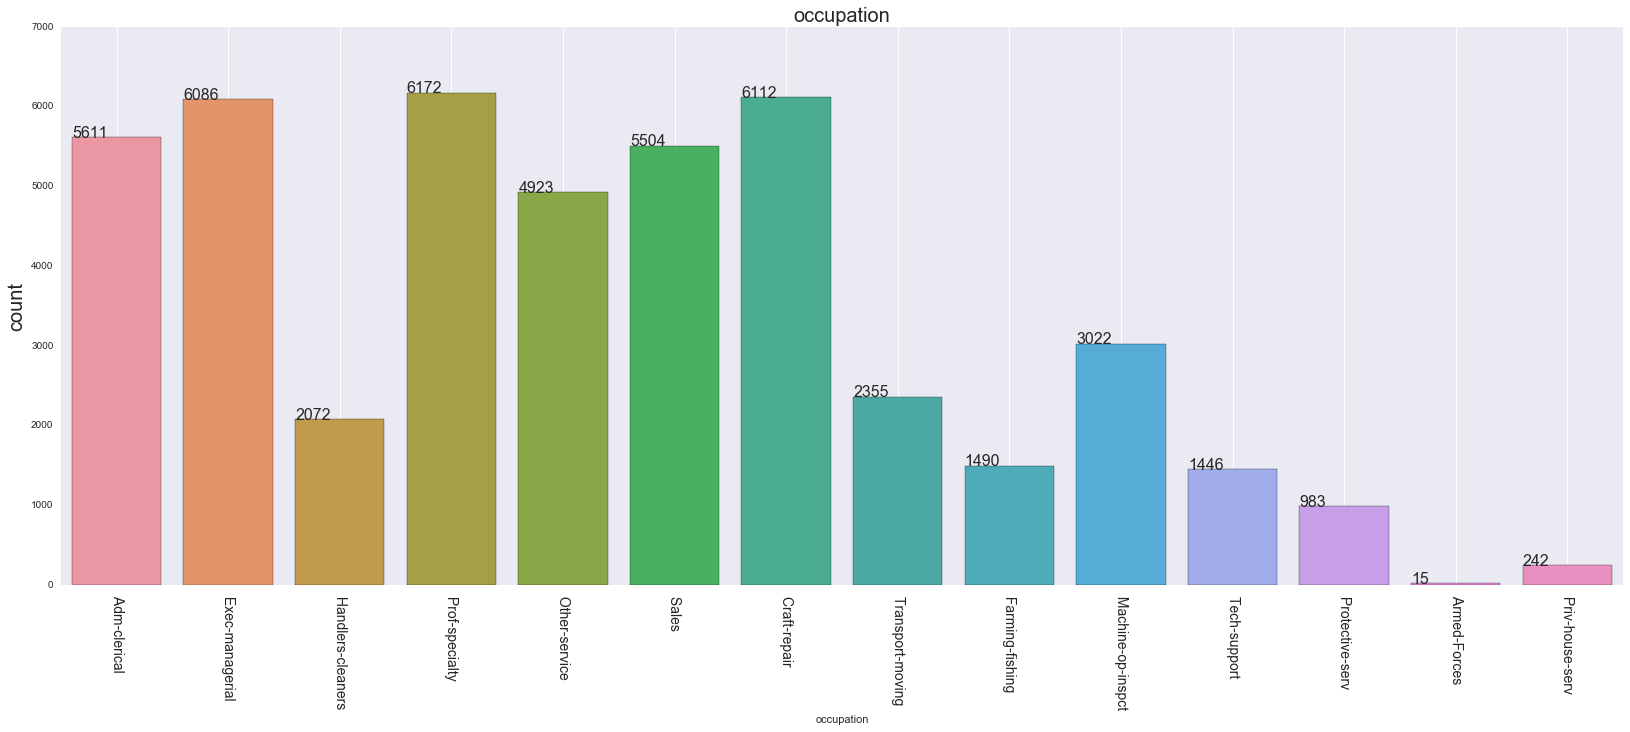

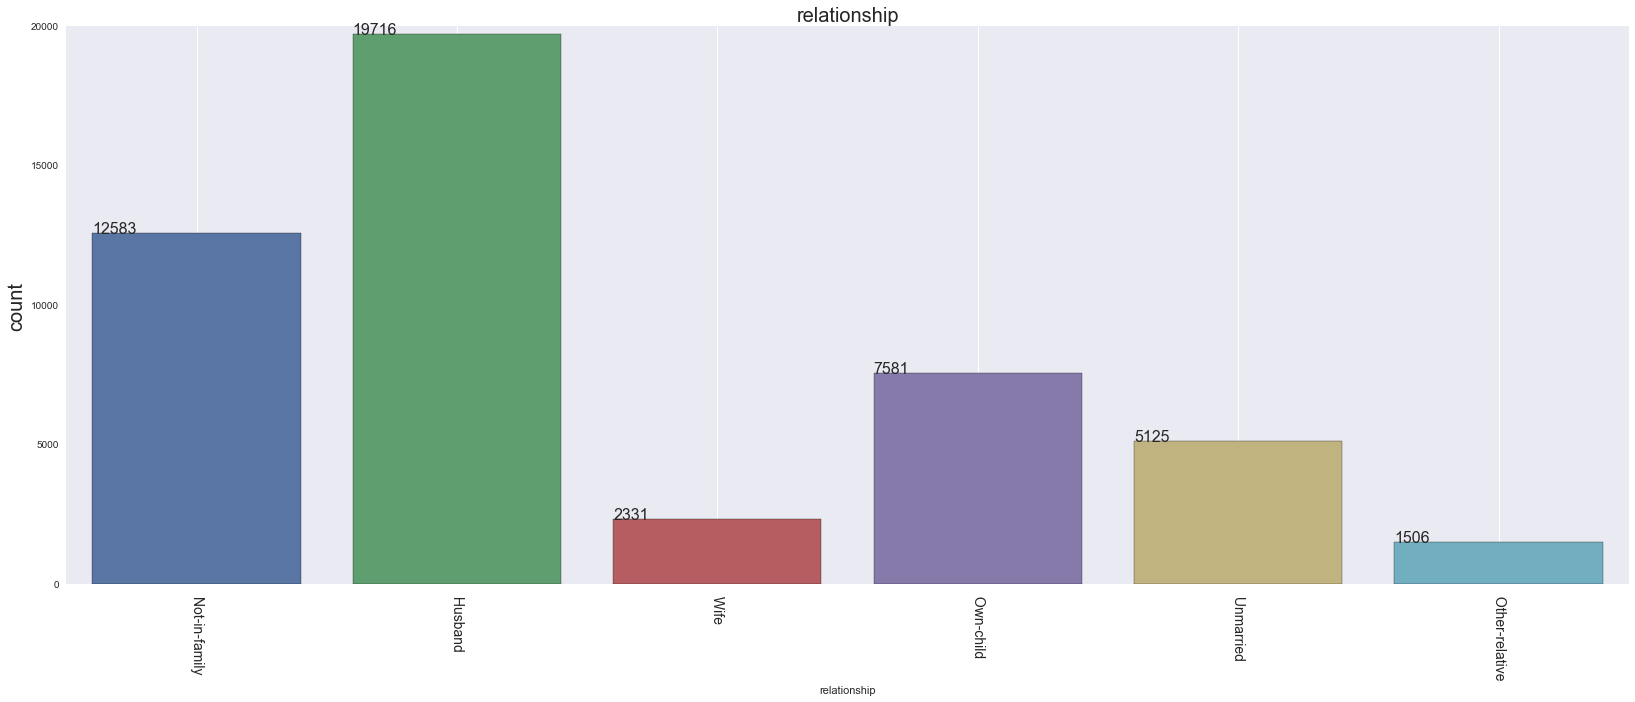

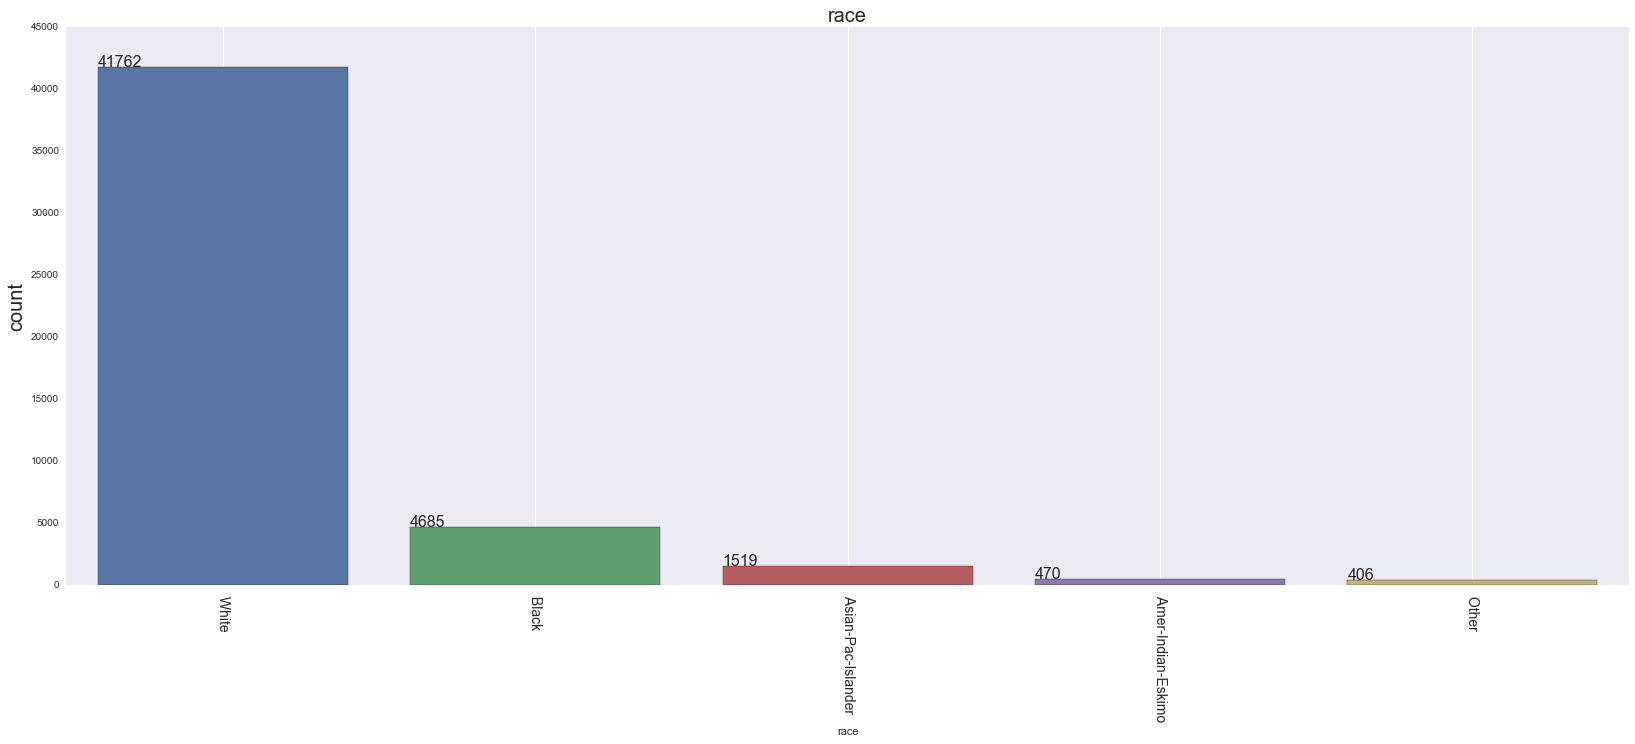

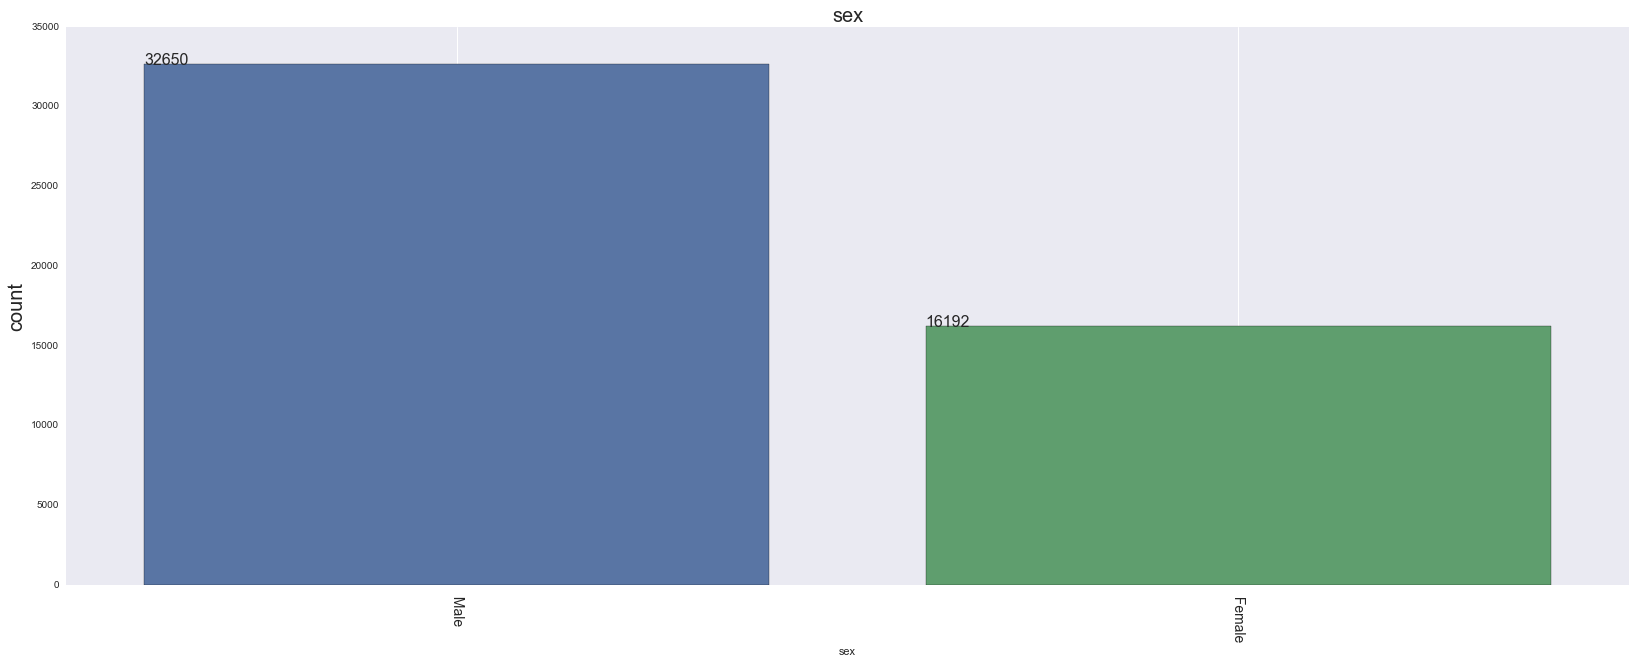

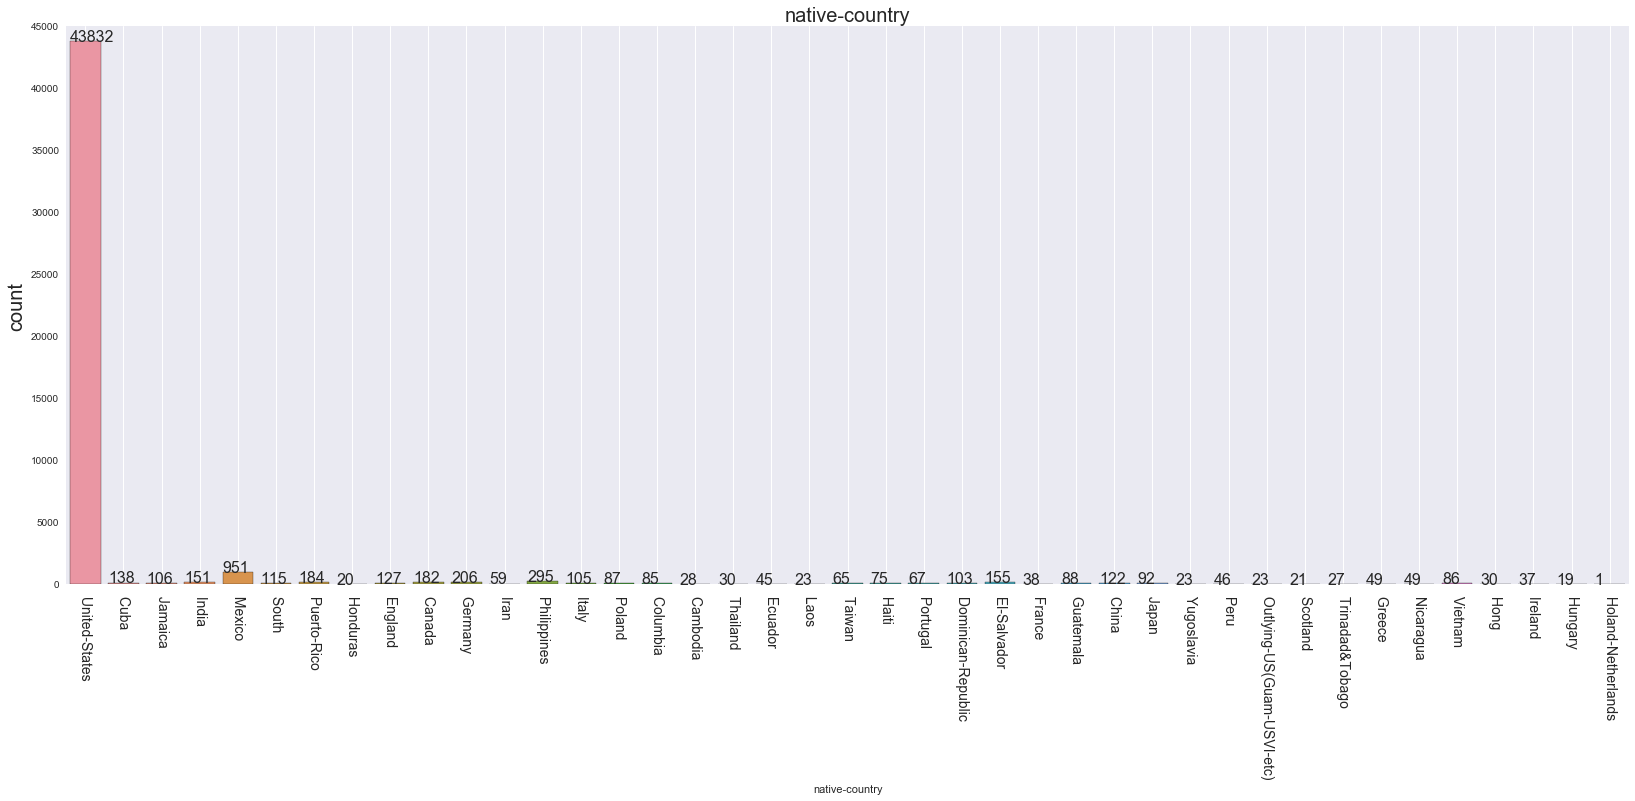

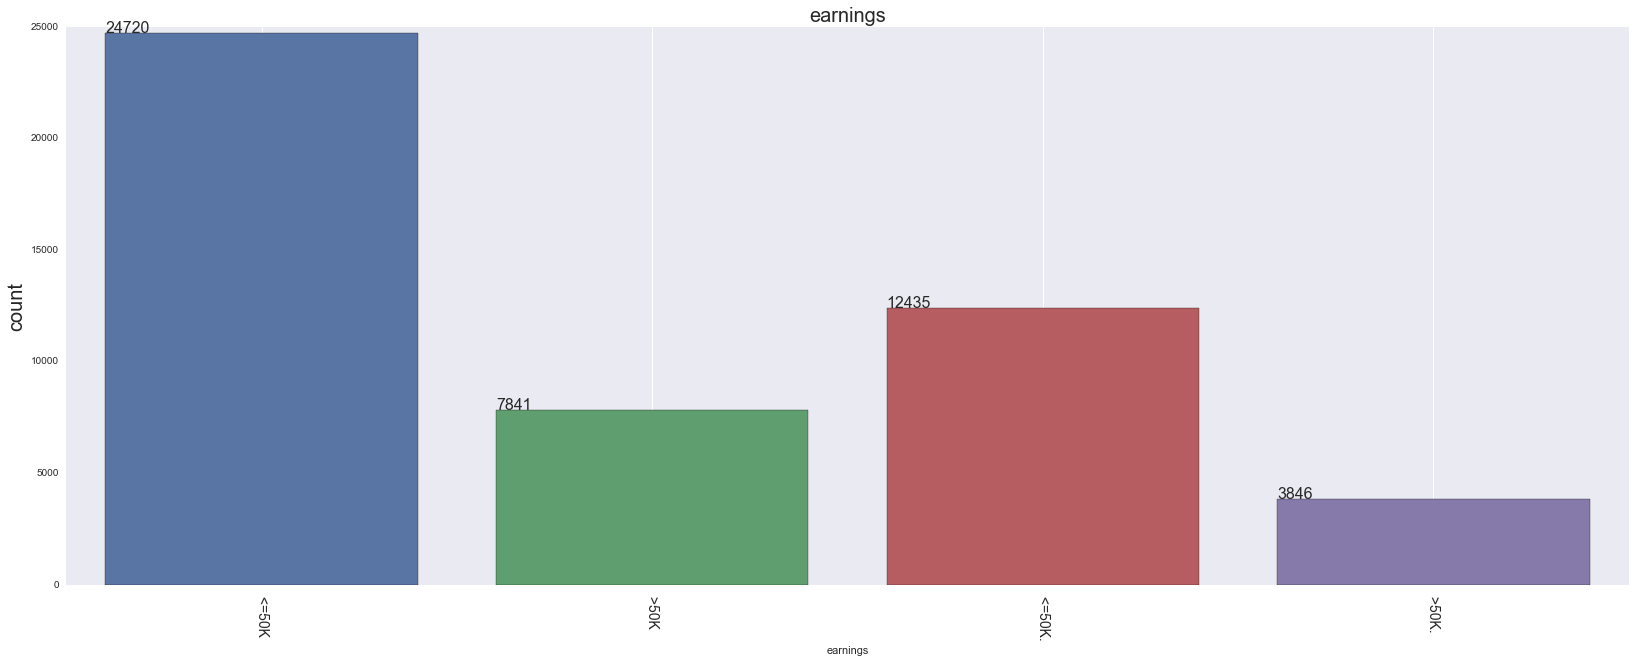

In [28]:
# Visualização das features categóricas

for feature in list(data.select_dtypes(include=['object']).columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    ax = sns.countplot(data[feature],label='Distribuição das idades')
    #ax = data[feature].value_counts().plot.bar()
    ax.set_alpha(0.8)
    
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)
    
    plt.grid()

plt.show()

##### Verificação de Valores Faltantes no Dataset

In [29]:
# Valores nulos são considerados como "?". Adicionar aos valores NaN presentes.
data.replace(' ?',np.NaN,inplace=True)

In [30]:
# Existência de valores nulos(NaN)
data.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
earnings          False
dtype: bool

In [31]:
# Dados faltantes
print('Informações sobre dados faltantes:\n')
# Features com valores faltantes
features_faltantes = ['workclass', 'occupation', 'native-country']

# Guardando os índices com valores nulos
null_indexes = data.isnull().any(1).nonzero()[0]

# Porcentagem de valores faltantes
print('Quantidade de valores faltates: {}\nPorcentagem de valores faltantes: {:.3f}%'.format(len(null_indexes),100 * len(null_indexes)/len(data)))
print()

# Porcentagem de valores faltantes para cada feature
for feature in features_faltantes:
    print('Quantidade de valores faltantes para a feature {}: {}'.format(feature,data[feature].isnull().sum()))

Informações sobre dados faltantes:

Quantidade de valores faltates: 3620
Porcentagem de valores faltantes: 7.412%

Quantidade de valores faltantes para a feature workclass: 2799
Quantidade de valores faltantes para a feature occupation: 2809
Quantidade de valores faltantes para a feature native-country: 857


A variável <i>Earnings</i> é uma variável binária que precisa de tratamento, pois as strings que representam as duas classes existentes no dataset estão com labels errados.

#### Tratamento da variável earnings

In [32]:
# Possíveis valores para a variável earnings
print(data.earnings.unique())

[' <=50K' ' >50K' ' <=50K.' ' >50K.']


In [33]:
# Tratamento da feature Earnings: 
data.earnings.replace([' <=50K',' <=50K.'],'<=50K',inplace=True)
data.earnings.replace([' >50K',' >50K.'],'>50K',inplace=True)
data.earnings.unique()

array(['<=50K', '>50K'], dtype=object)

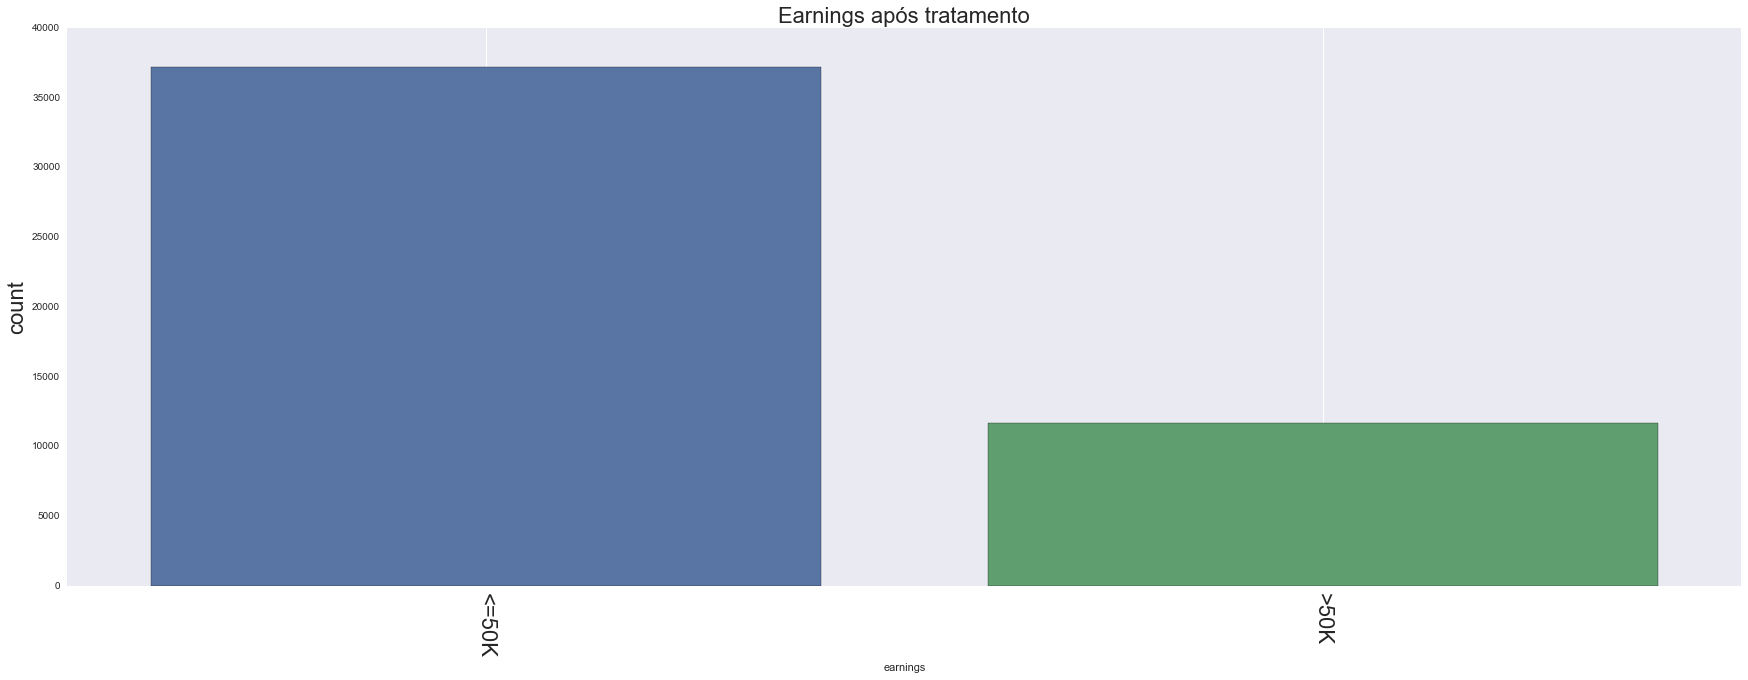

In [34]:
# Nova Visualização da variável Earnings

plt.figure(figsize=(30,10))
plt.title('Earnings após tratamento',fontsize=22)
plt.ylabel('Quantidade de indivíduos',fontsize=22)

ax = sns.countplot(data.earnings)
plt.xticks(rotation=-90,fontsize=22)

plt.grid()
plt.show()

Após o tratamento da variável, podemos perceber que o dataset é desbalanceado, isto é, a quantidade de exemplos de uma classe é superior à quantidade de exemplos da outra classe.

#### Resumo dos dados

Após o primeiro contato com os dados presentes no dataset, podemos resumir algumas informações para consulta posterior:

|      Variável      | Descrição                    | Tipo de variável  | Valores Ausentes? |
| -------------------|------------------------------|-------------------|-------------------|
| Age                | Idade do indivíduo           | Numérica          |        Não        | 
| Workclass          | Ramo da Atividade Exercida   | Nominal           |        Sim        | 
| Fnlwgt             | Peso Estatístico da Amostra  | Numérica          |        Não        |
| Education          | Nível de Educação            | Nominal           |        Não        |
| Education num      | Nível de Educação            | Ordinal           |        Não        |
| Marital Status     | Estado Civil                 | Nominal           |        Não        |
| Occupation         | Emprego Atual                | Nominal           |        Sim        |
| Hours-Per-Week     | Horas trabalhadas por semana | Numérica          |        Não        |
| Relationship       | Relacionamento               | Nominal           |        Não        |
| Race               | Raça do Indivíduo            | Nominal           |        Não        |
| Sex                | Sexo do Indivíduo            | Binária           |        Não        |
| Capital Gain       | Ganhos do Indivíduo          | Numérica          |        Não        |
| Capital Loss       | Gastos do Indivíduo          | Numérica          |        Não        |
| Native country     | País de Origem do Indivíduo  | Nominal           |        Sim        |
| Earnings           | Ganho Anual do Indivíduo     | Binária           |        Não        |

### Observações sobre os dados

 - O dataset é desbalanceado;
 - Não é clara a distinção entre a feature <i>Education</i> e <i>Education-Num</i>;
 
Adicionar outras observações em breve

### Avaliação preliminar dos dados

Os gráficos gerados acima servem como ponto inicial da análise exploratória do dataset, que estimula alguns questionamentos a serem analisados:

 - Qual a relação entre os dados ?
 - Qual a relação entre as features e o target ?
 - Qual a relação entre Education e Education-Num ? E Education e Earnings ?
 - Existem diferenças entre Marital-Status e Relationship ?
 - O que realmente significam as features Capital-Gain e Capital-Loss ?
 - Existe relação direta entre Hours-Per-Week e Earnings ?
 - Qual a relação entre nacionalidade e Earnings ?
 - O peso estatístico realmente influencia ?
 - Existem outliers ?

### Caracterização e visualização dos dados

Como requisito do trabalho, a caracterização e visualização de cada feature é realizada a seguir.

#### Atributo Idade

A variável idade representa a idade do indivíduo entrevistado no censo, como descrito anteriormente.

In [162]:
# Estatísticas básicas
data.age.describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

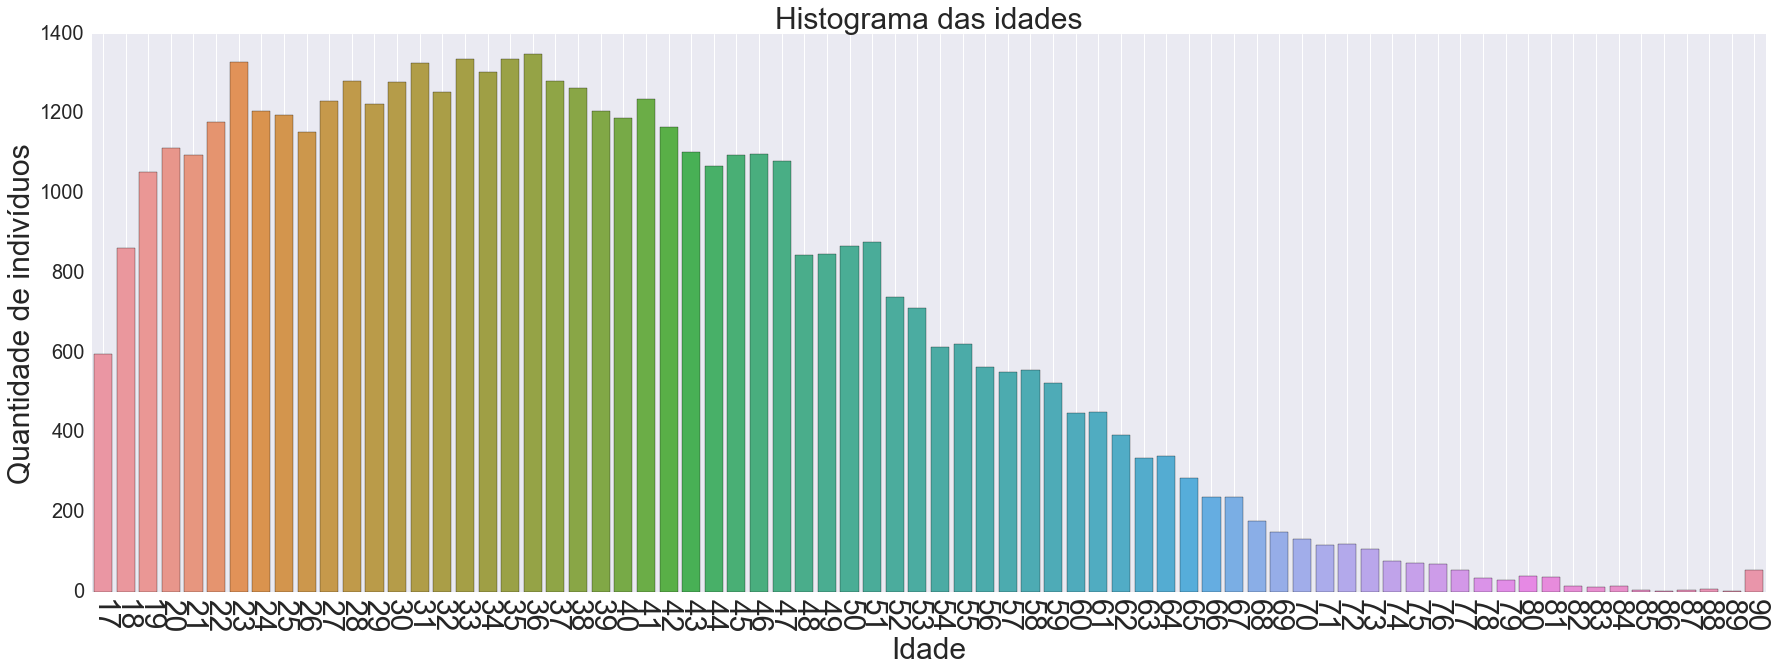

In [167]:
# Visualização dos dados (novamente) : Countplot 
plt.figure(figsize=(30,10))
sns.countplot(data['age'].values.astype(int),label='Distribuição das idades')
plt.xlabel('Idade',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.title('Histograma das idades',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=20)
plt.grid()

plt.savefig('Images/Age_hist.png')

plt.show()

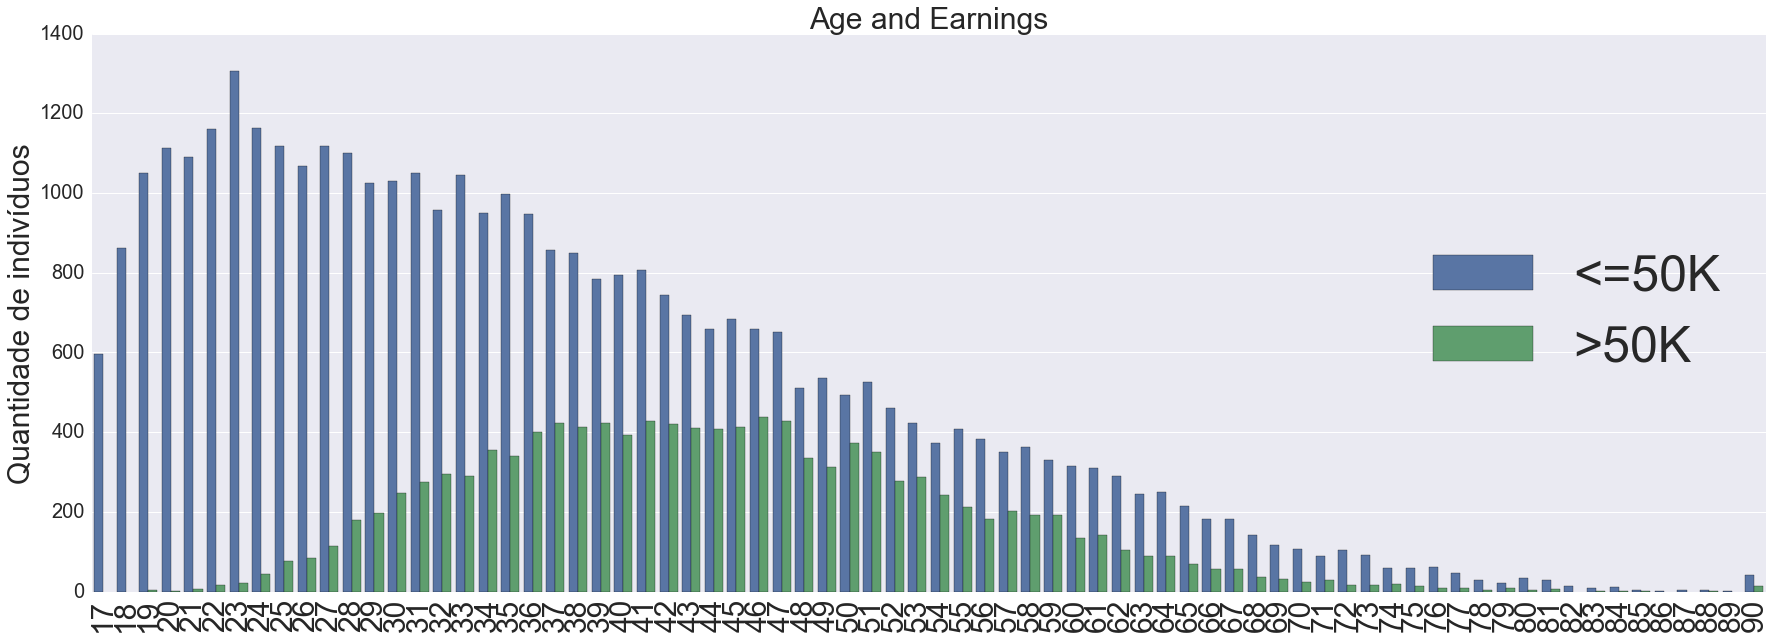

In [174]:
# Verificando a relação idade e ganhos
plt.figure(figsize=(30,10))
data.age.astype(int)
ax = sns.countplot(x=data['age'].values.astype(int),hue='earnings',data=data)
plt.title('Age and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc=5, prop={'size': 50})
plt.show()

In [ ]:
# Verificando a relação Idade e Sexo
plt.figure(figsize=(30,10))
data.age.astype(int)
ax = sns.countplot(x=data['age'].values.astype(int),hue='earnings',data=data)
plt.title('Age and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=20)
plt.legend(loc=5, prop={'size': 50})
plt.show()

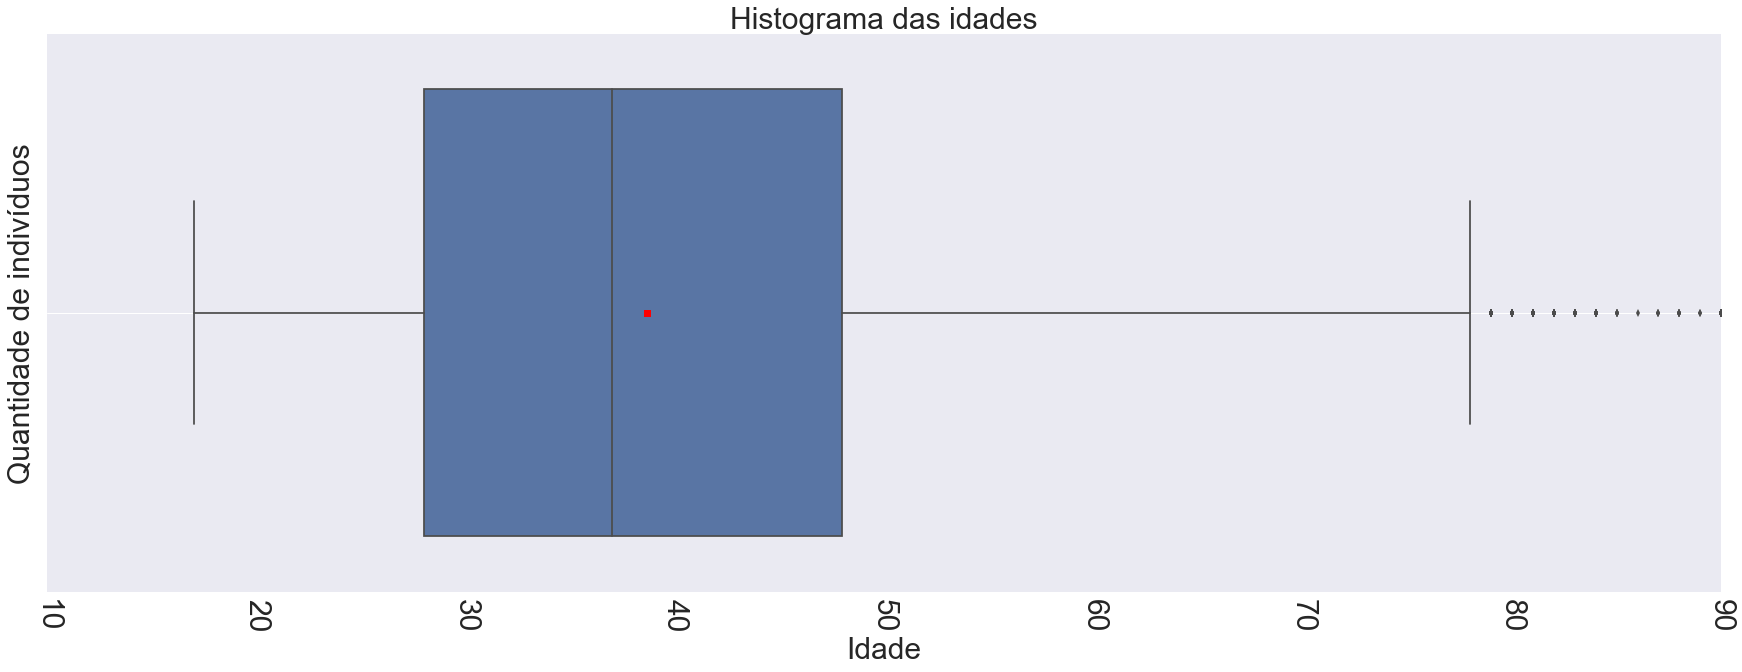

In [175]:
# Boxplot novamente
plt.figure(figsize=(30,10))
sns.boxplot(x=data['age'].values,showmeans=True)
plt.xlabel('Idade',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.title('Histograma das idades',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.grid()
plt.savefig('Images/Age_boxplot.png')
plt.show()

In [43]:
# Definição dos quantis
Q1, Q3 = data.age.quantile(0.25), data.age.quantile(0.75)

# Definição de IQR de acordo com o método de Tukey
IQR = Q3 - Q1

# De acordo com o boxplot, não existem outliers abaixo de Q1 - 1.5*IQR
outliers = data[data.age > (Q3 + 1.5 * IQR)]

# Visualização dos outliers
outliers.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
74,79.0,Private,124744.0,Some-college,10.0,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0.0,0.0,20.0,United-States,<=50K
222,90.0,Private,51744.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K
430,80.0,NaN,107762.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Male,0.0,0.0,24.0,United-States,<=50K
918,81.0,Self-emp-not-inc,136063.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K
1040,90.0,Private,137018.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1168,88.0,Self-emp-not-inc,206291.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1935,90.0,Private,221832.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
2303,90.0,Private,52386.0,Some-college,10.0,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
2754,80.0,Self-emp-not-inc,184335.0,7th-8th,4.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K
2891,90.0,Private,171956.0,Some-college,10.0,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K


In [53]:
# Quantidade de outliers presentes:
print(len(outliers), Q1, Q3)

216 28.0 48.0


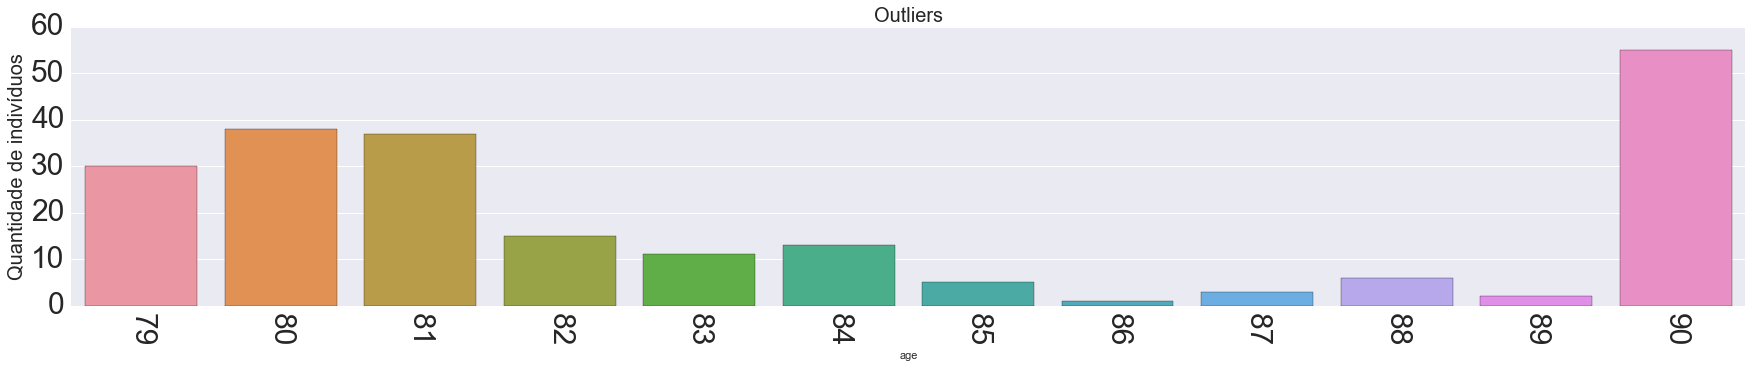

In [181]:
# Relação com age e earnings
plt.figure(figsize=(30,5))
sns.countplot(outliers.age.astype(int))
plt.title('Outliers',fontsize=20)
plt.ylabel('Quantidade de indivíduos',fontsize=20)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=30)
plt.show()

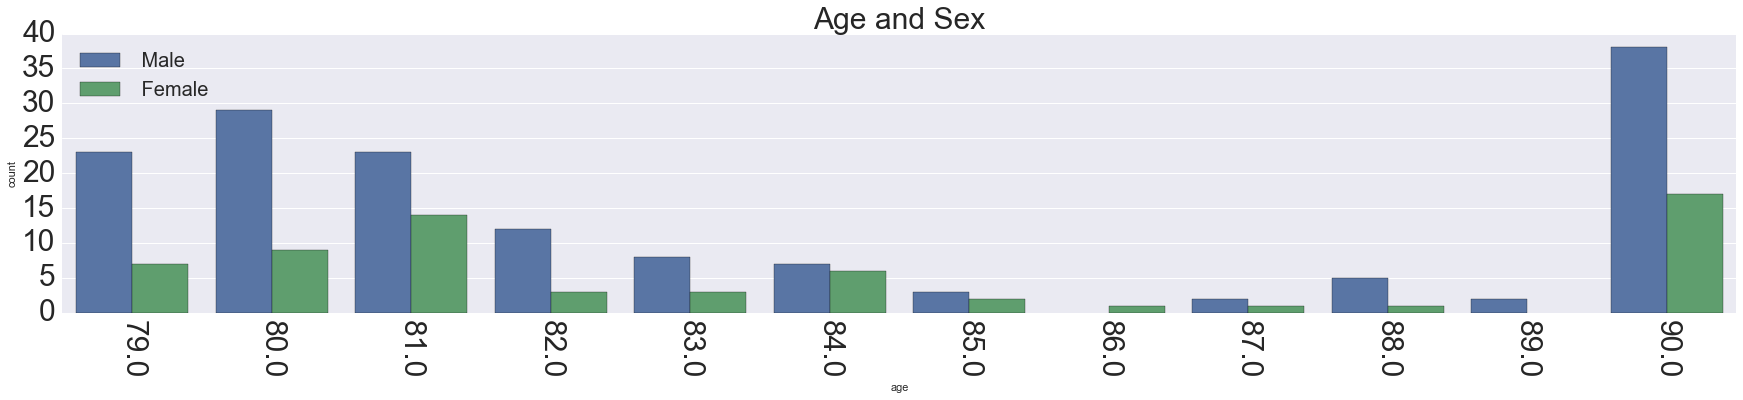

In [180]:
# Verificando a relação entre a idade e sexo
plt.figure(figsize=(30,5))
sns.countplot(x='age',hue='sex',data=outliers)
plt.title('Age and Sex',fontsize=30)
plt.xticks(rotation=-90,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2, prop={'size': 20})
plt.show()

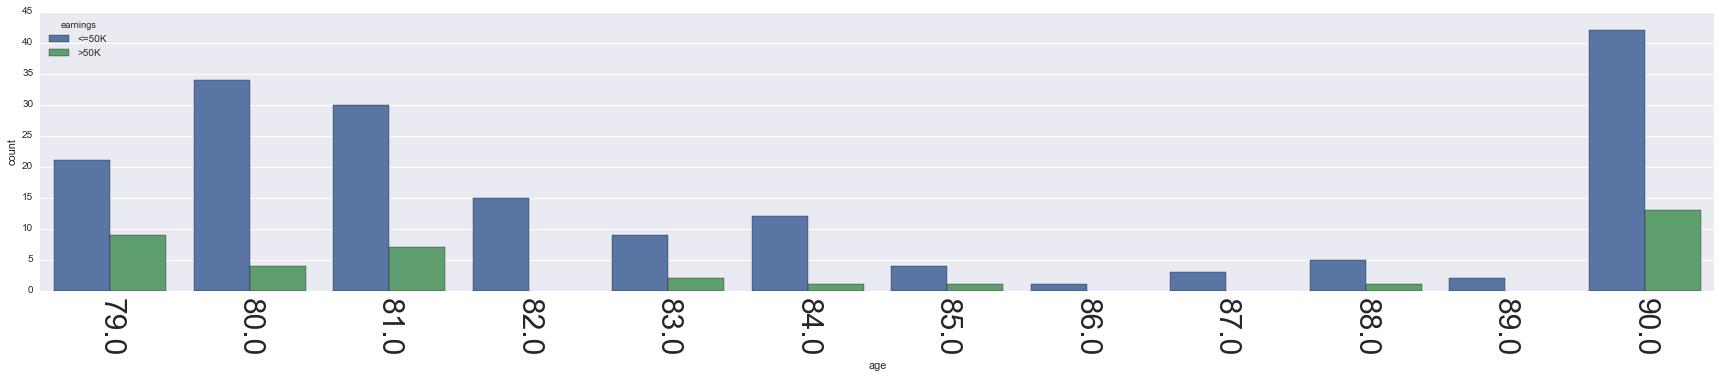

In [45]:
# Verificando a relação entre a idade e ganhos anuais
plt.figure(figsize=(30,5))
sns.countplot(x='age',hue='earnings',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

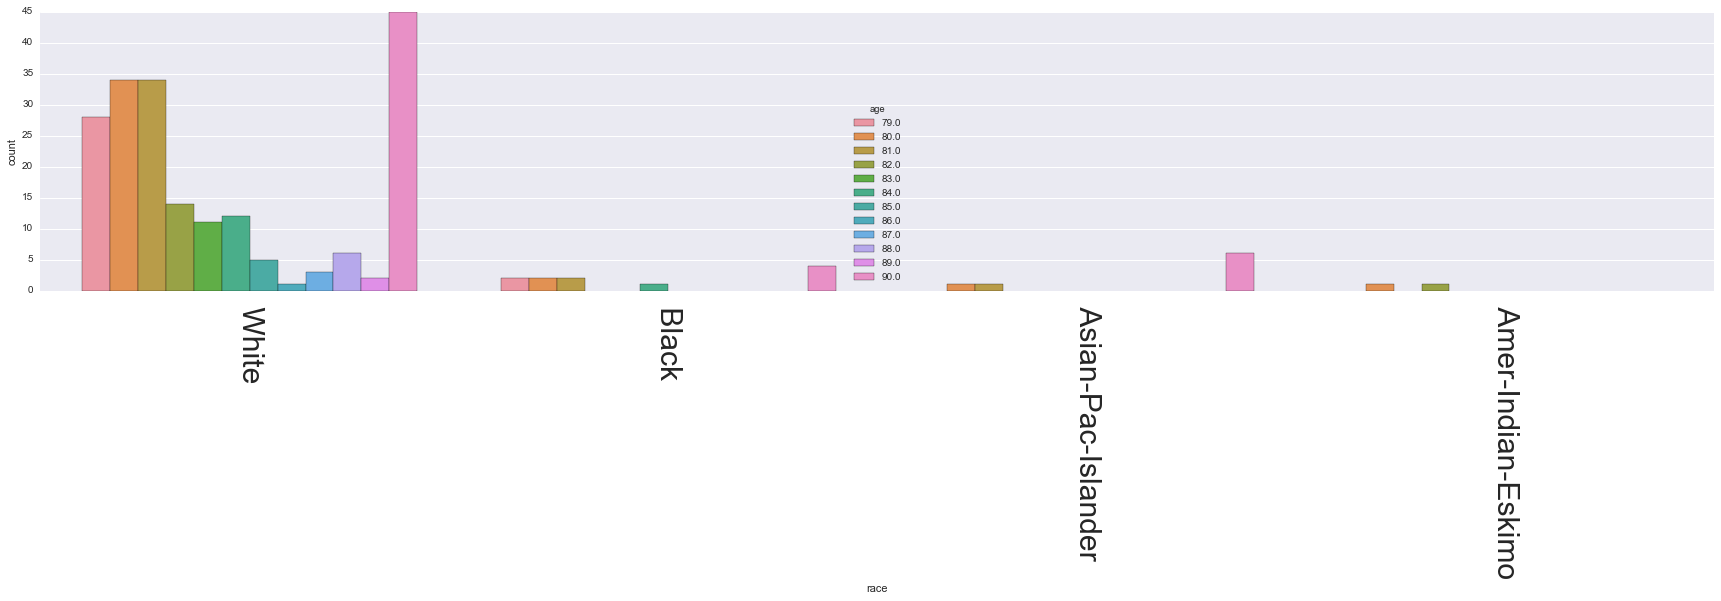

In [55]:
# Verificando a relação entre idade e raça
plt.figure(figsize=(30,5))
sns.countplot(x='race',hue='age',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

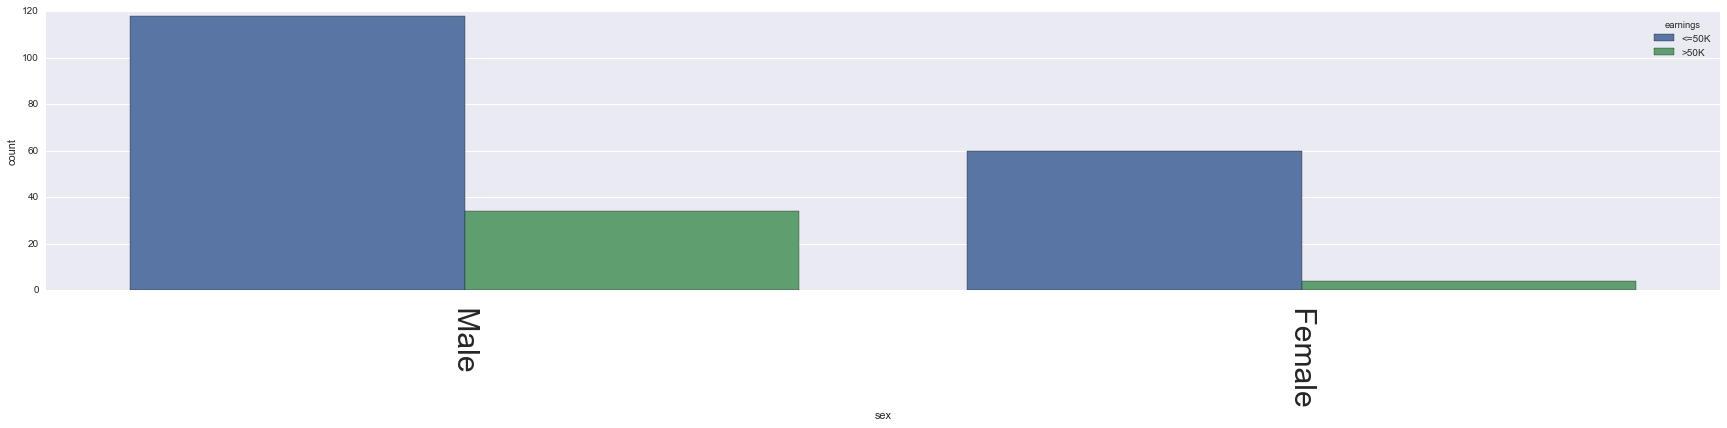

In [56]:
# Relação entre sexo e ganhos
plt.figure(figsize=(30,5))
sns.countplot(x='sex',hue='earnings',data=outliers)
plt.xticks(rotation=-90,fontsize=30)
plt.show()

#### Workclass

A feature Workclass representa o ramo ao qual o indivíduo trabalha, sendo dividido em sete categorias: Private, Self-emp-not-inc, Local-gov, State-gov, Self-emp-inc, Federal-gov, Without-pay.

In [75]:
# Representatividade de cada classe
data.workclass.value_counts() * 100 /(len(data))

 Private             69.419762
 Self-emp-not-inc     7.907129
 Local-gov            6.420703
 State-gov            4.055935
 Self-emp-inc         3.470374
 Federal-gov          2.931903
 Without-pay          0.042996
 Never-worked         0.020474
Name: workclass, dtype: float64

In [91]:
# Existem valores ausentes?
print('Quantidade de exemplos faltantes: {}'.format(data.workclass.isnull().sum()))

Quantidade de exemplos faltantes: 2799


In [98]:
# Substituindo os valores faltantes por uma classe 'others'
data.workclass.replace(np.nan, 'Others',inplace=True)

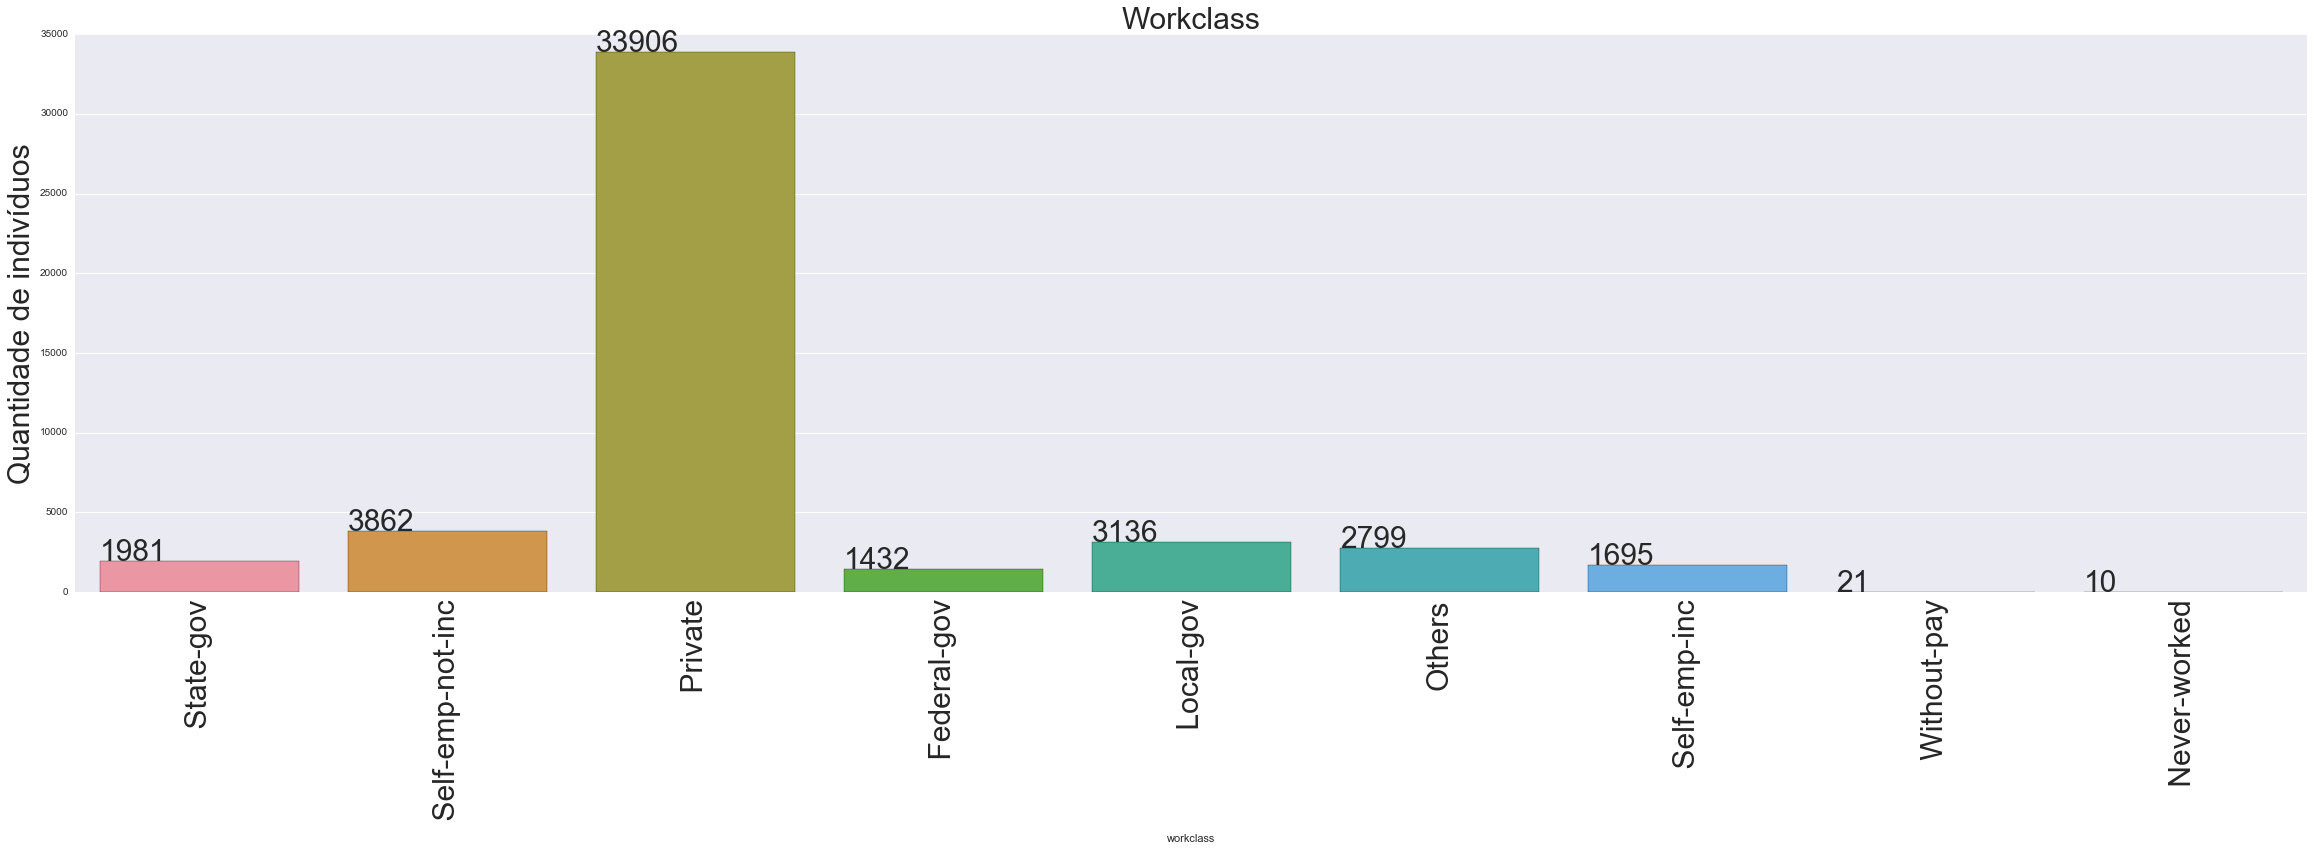

In [99]:
# Visualização (novamente) da feature Workclass
plt.figure(figsize=(40,10))
ax = sns.countplot(data.workclass)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

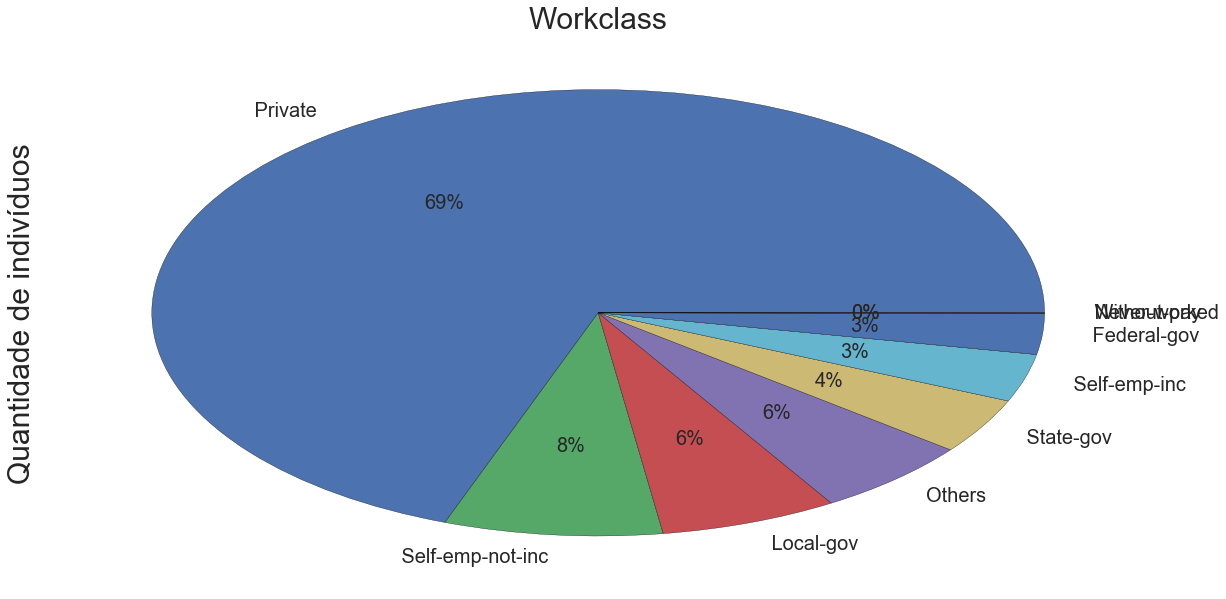

In [100]:
# Pizza plot
plt.figure(figsize=(20,10))
data.workclass.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

ValueError: cannot convert float NaN to integer

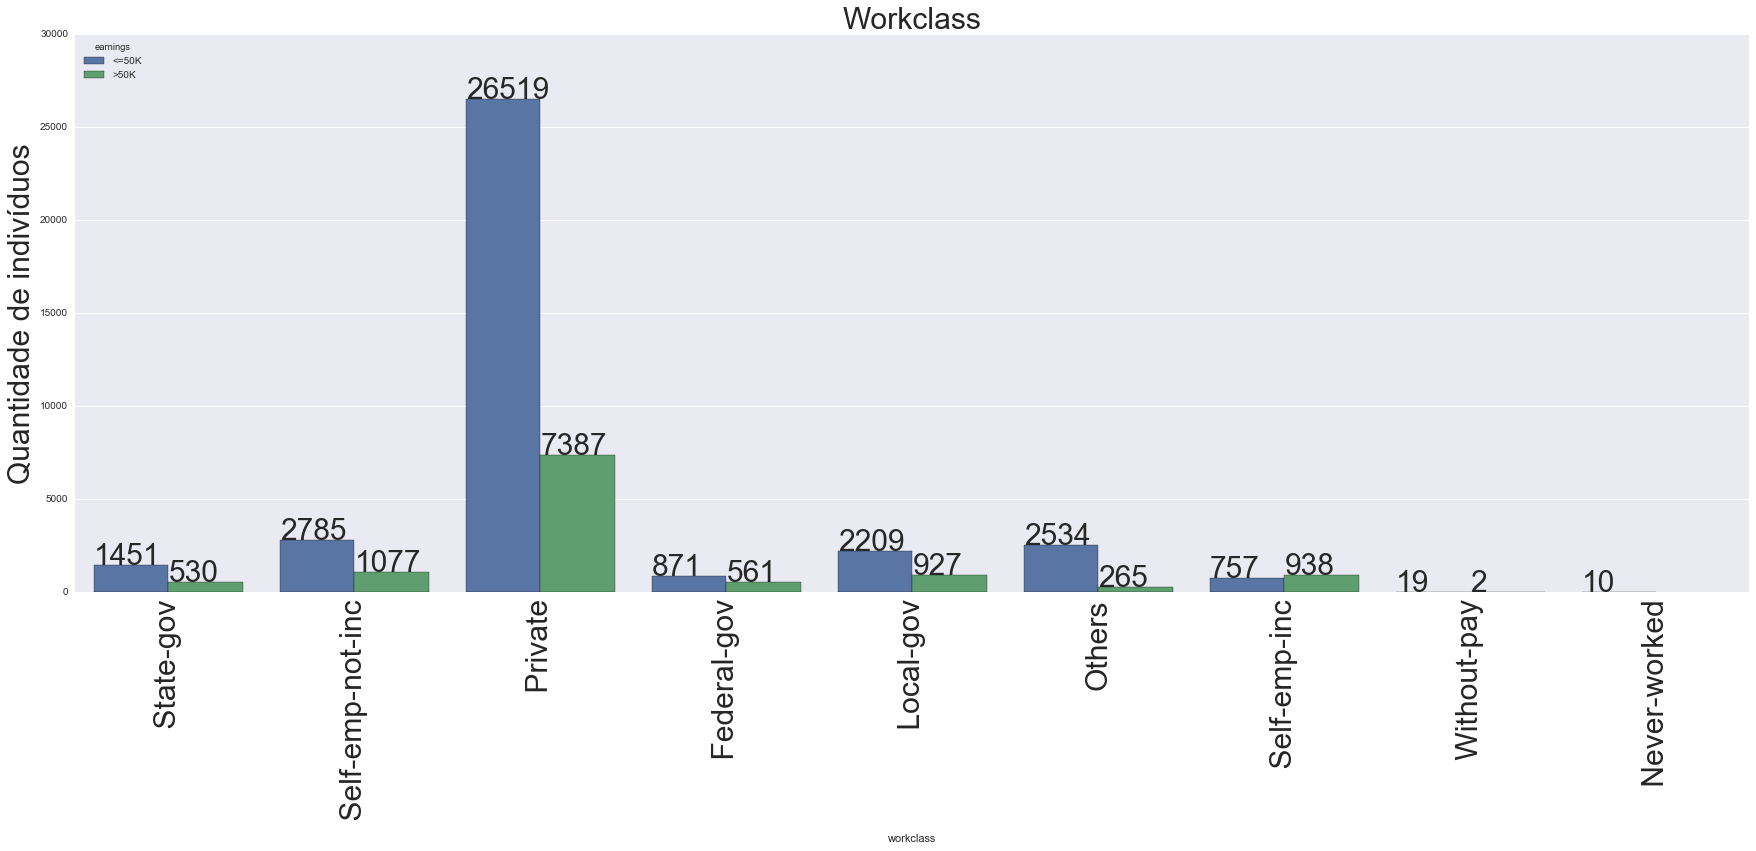

In [148]:
# Relações entre Workclass e Earnings
plt.figure(figsize=(30,10))
ax = sns.countplot(x='workclass',hue='earnings',data=data)

plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

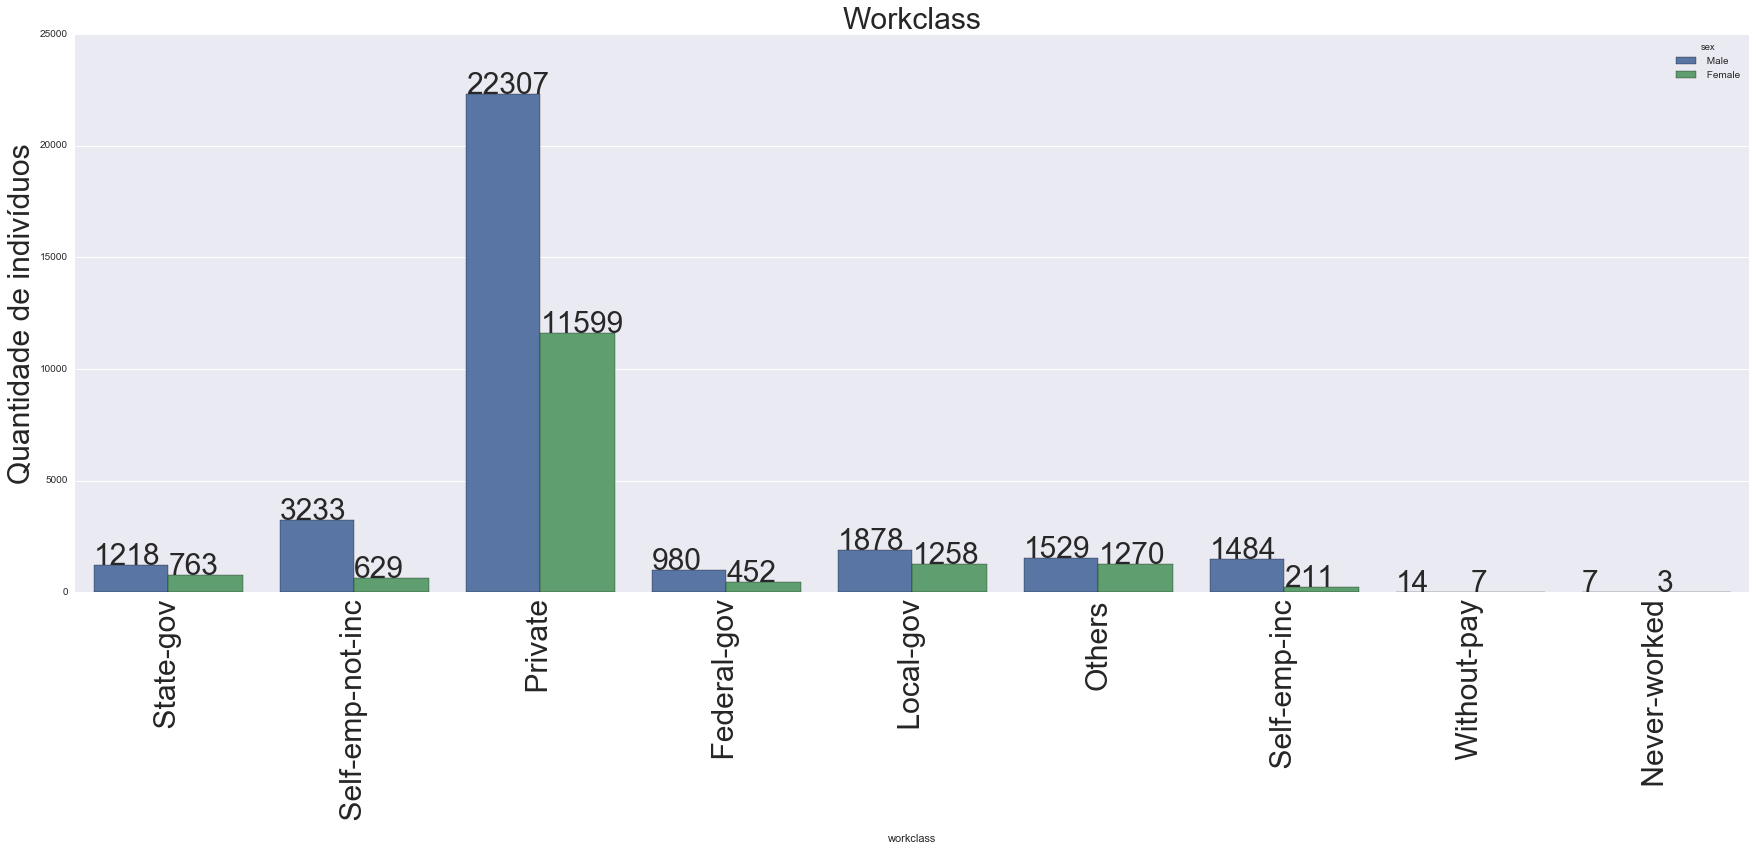

In [106]:
# Como os sexos se distribuem de acordo com os ramos de trabalho
plt.figure(figsize=(30,10))

ax = sns.countplot(x='workclass',hue='sex',data=data)
plt.title('Workclass',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=30)
    
plt.show()

##### Observações

- As classes <i>Without-pay</i> e <i>Never-worked</i> possuem baixa representatividade em relação às outras classes presentes (0.042996 e 0.020474 respectivamente), enquanto que valores faltantes possuem mais exemplos que outras classes definidas. Na etapa de pré-processamento será decidida a forma de como será realizada a imputação de dados.

#### Fnlwgt

#### <i>Education</i> e <i>Education-num</i>

As features education e education-num representam, respectivamente, o nível de escolaridade de um indivíduo, e a quantidade de anos de educação do mesmo. De acordo com os gráficos preliminares gerados anteriormente, percebe-se que existe alguma equivalência entre os seus valores. Uma investigação mais minuciosa é realizada abaixo.

In [107]:
print('Possíveis valores para a feature education:\n')
print(', '.join([i for i in list(data.education.unique())]))

Possíveis valores para a feature education:

 Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  Assoc-voc,  7th-8th,  Doctorate,  Prof-school,  5th-6th,  10th,  1st-4th,  Preschool,  12th


Realizando o mesmo procedimento para a feature <i>Education-num</i>:

In [108]:
print('Possíveis valores para a feature education-num:\n')
print(', '.join([i for i in list(data['education-num'].astype(str).unique())]))

Possíveis valores para a feature education-num:

13.0, 9.0, 7.0, 14.0, 5.0, 10.0, 12.0, 11.0, 4.0, 16.0, 15.0, 3.0, 6.0, 2.0, 1.0, 8.0


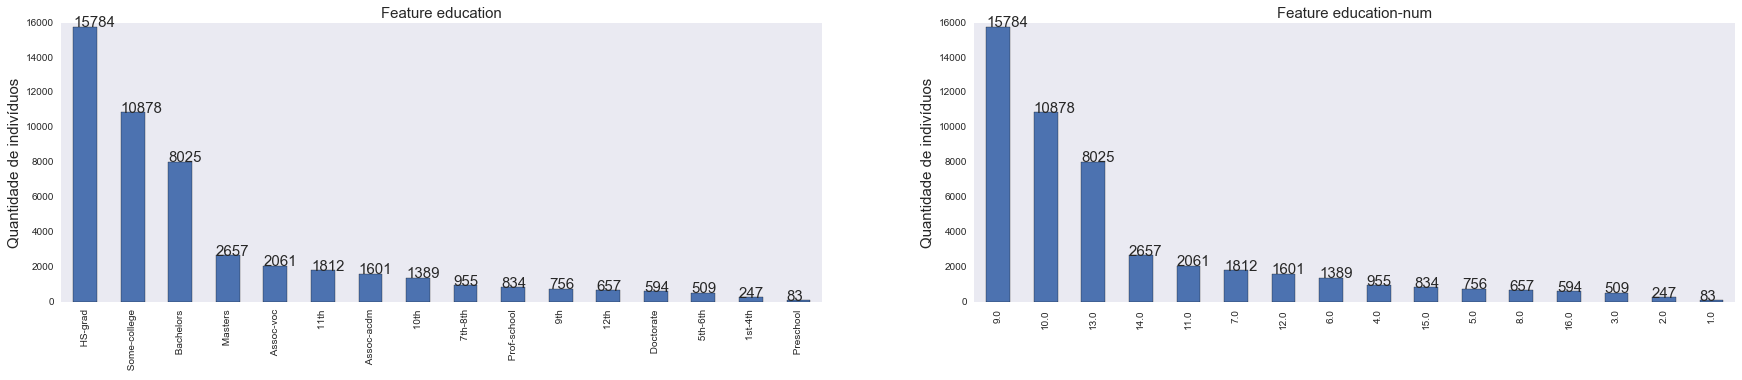

In [113]:
# Realizando a comparação visual de cada feature, com histogramas:
plt.figure(figsize=(30,5))
plt.subplot(121)
ax = data['education'].value_counts().plot.bar()
plt.title('Feature education',fontsize=15)
plt.ylabel('Quantidade de indivíduos',fontsize=15)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.grid()

plt.subplot(122)
ax = data['education-num'].value_counts().plot.bar()
plt.title('Feature education-num',fontsize=15)
plt.ylabel('Quantidade de indivíduos',fontsize=15)
plt.grid()

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

Os gráficos de cada feature são semelhantes, nos levando a dizer que as features são redundantes, porém a feature <i>Education-num</i> possui menos representatividade do que a outra feature, pois entendemos qual é o nível de escolaridade de cada pessoa entrevistada. Investigando mais os valores dos bins para a certeza de que as features são equivalentes:

Assim, podemos montar uma tabela de equivalência entre as duas features:

|      Education     | Education-num                |
| -------------------|------------------------------|
| Pre-School         | 1                            |
| 1st - 4th          | 2                            |
| 5th - 6th          | 3                            |
| 7th - 8th          | 4                            |
| 9th                | 5                            |
| 10th               | 6                            |
| 11th               | 7                            |
| 12th               | 8                            |
| HS-grad            | 9                            |
| Some-College       | 10                           |
| Assoc-Voc          | 11                           |
| Assoc-Acdm         | 12                           |
| Bachelors          | 13                           |
| Masters            | 14                           |
| Prof-School        | 15                           |
| Doctorate          | 16                           |

Como existe a equivalência entre as features, uma delas deve ser eliminada, pois não traz nenhuma informação adicional para o problema.

In [114]:
# Removendo a feature education-num
data.drop(['education-num'],axis=1,inplace=True)

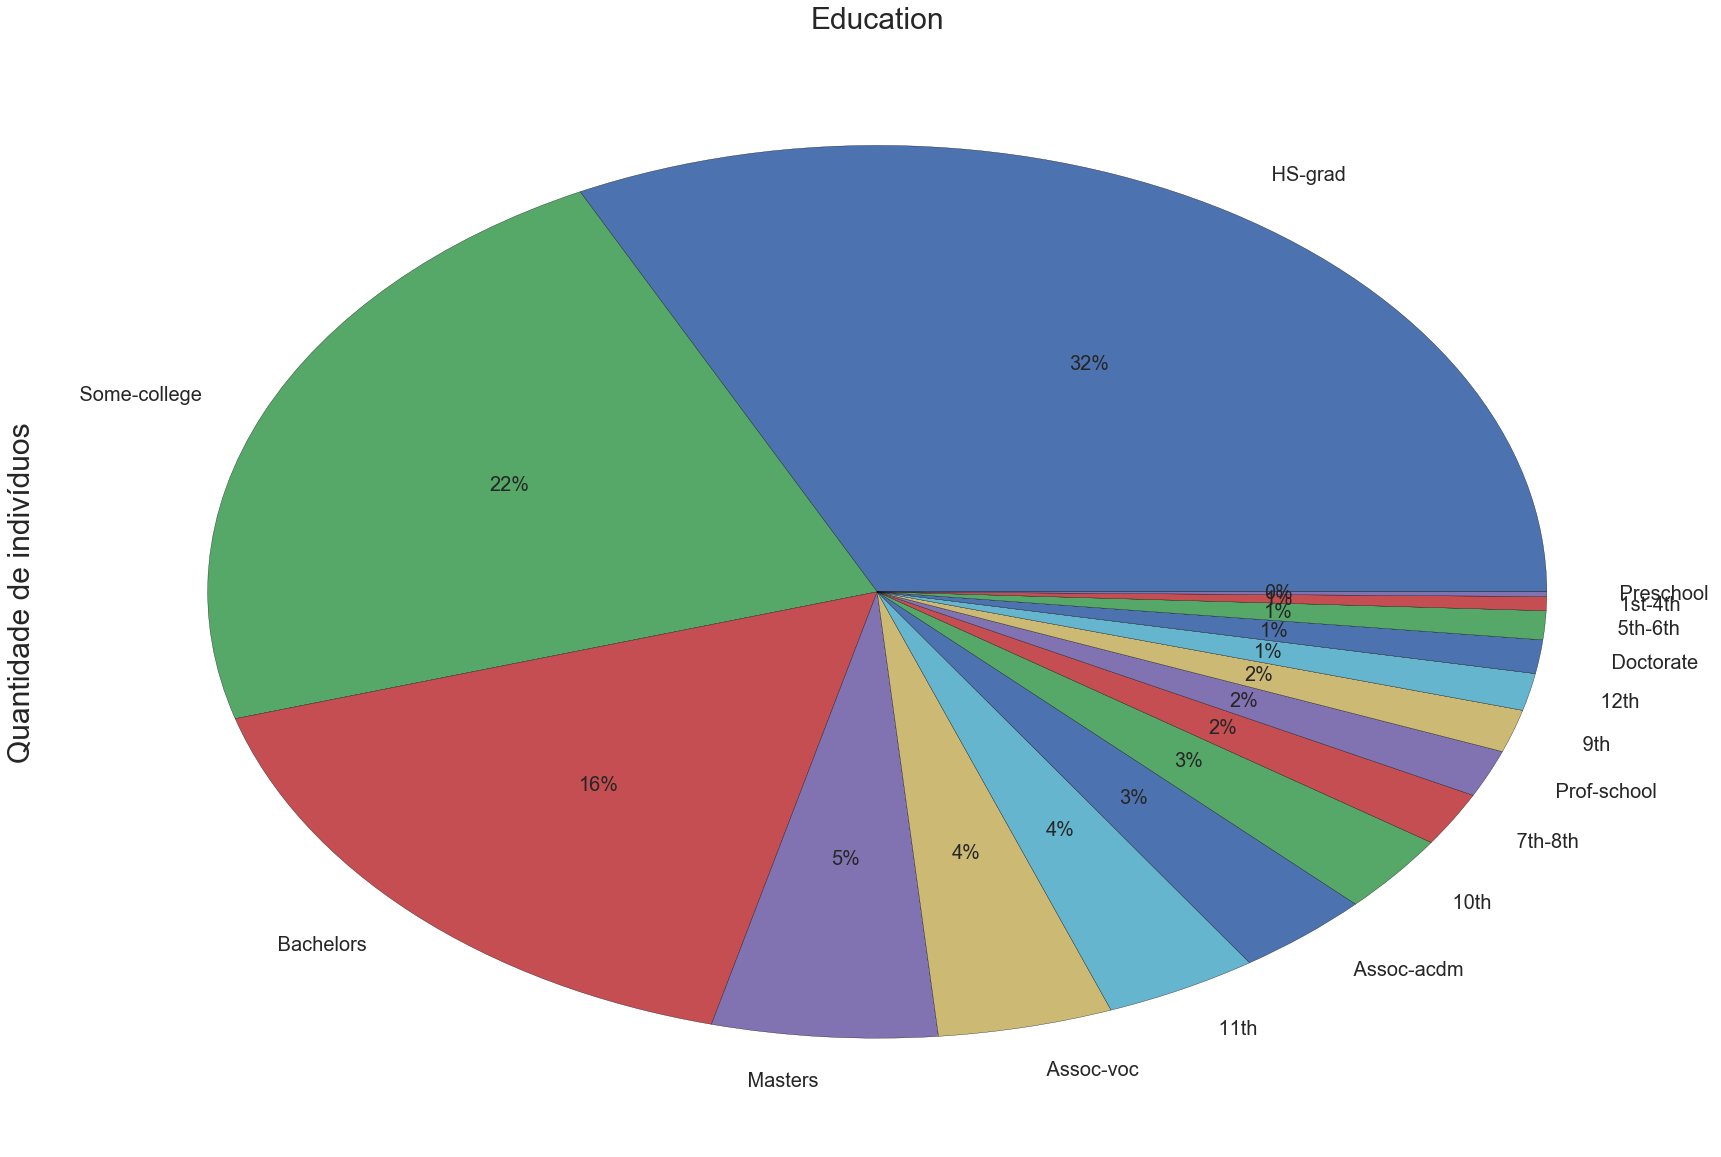

In [147]:
# Verificando a distribuição da feature education, utilizando Pizza plot
plt.figure(figsize=(30,20))
data.education.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Education',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=25)
    
plt.show()

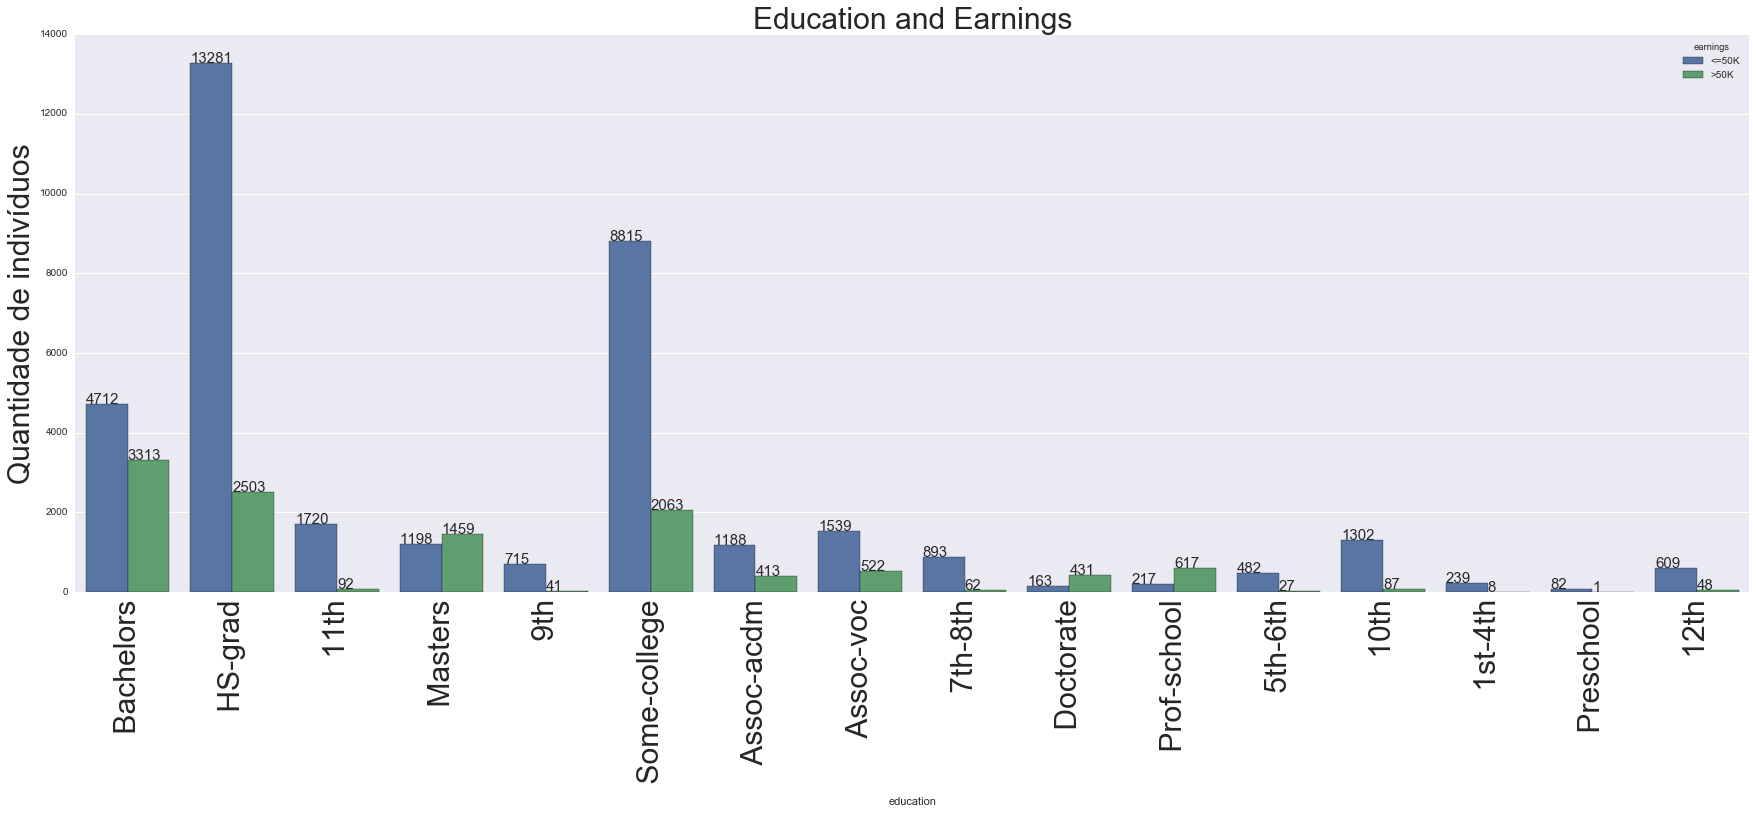

In [133]:
# Verificando a relação da feature Education e os ganhos 

education = ['Doctorate','Prof-School','Masters','Bachelors','Assoc-Acdm','Assoc-Voc','Some-College','HS-grad','12th','11th','10th','9th','7th - 8th','5th - 6th','1st - 4th','Pre-School']

plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='earnings',data=data)
plt.title('Education and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

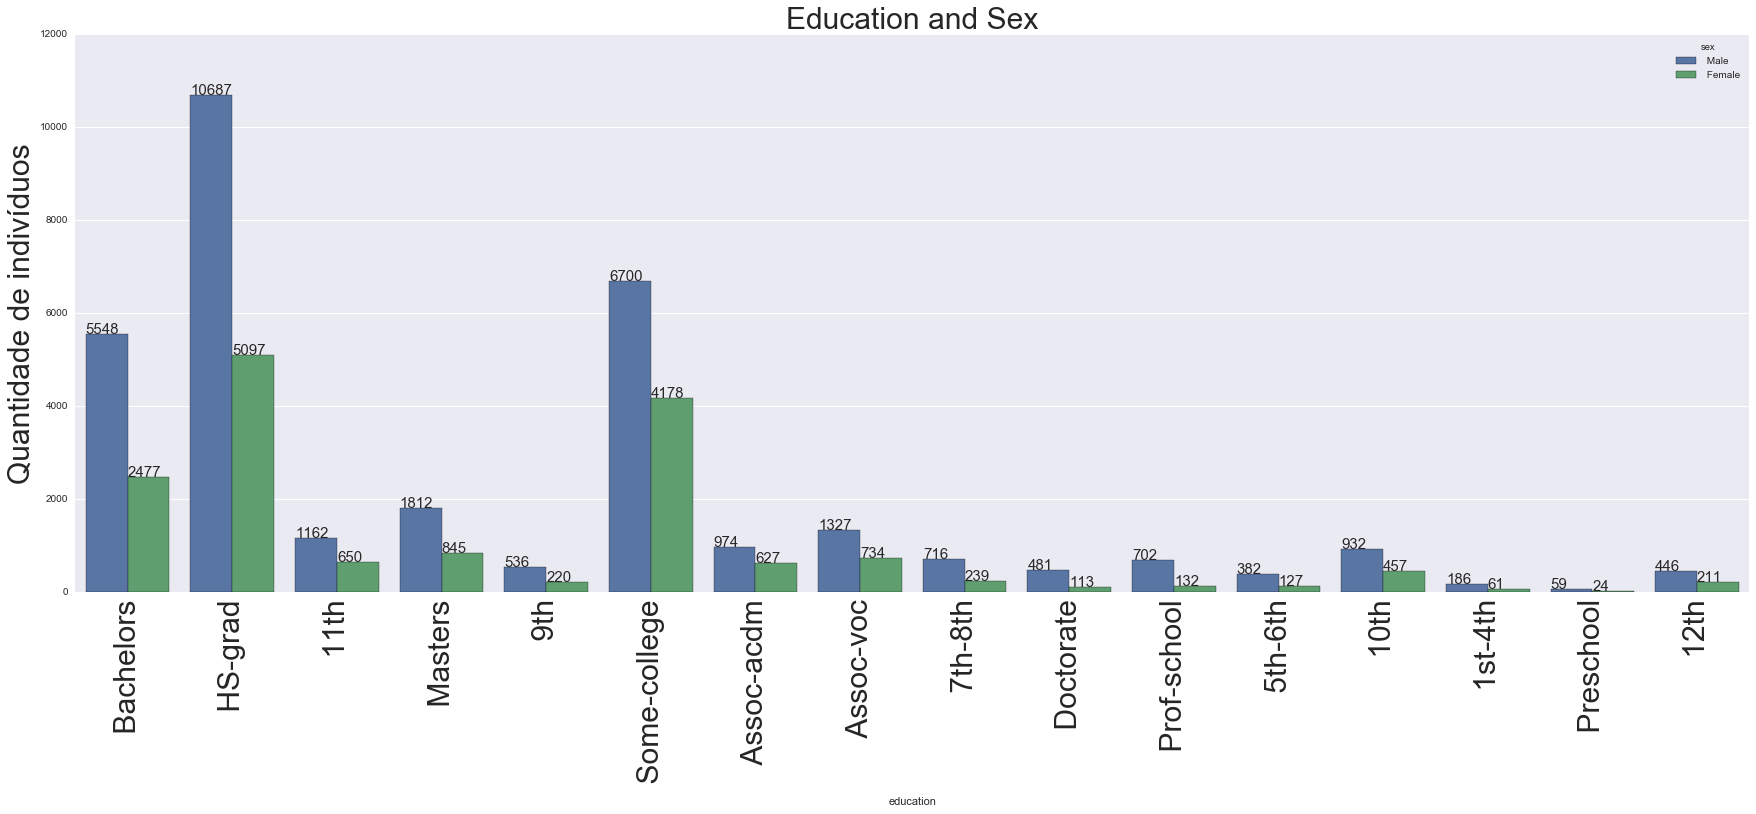

In [135]:
# Verificando a relação da feature Education e sexo 
plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='sex',data=data)
plt.title('Education and Sex',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=15)

plt.show()

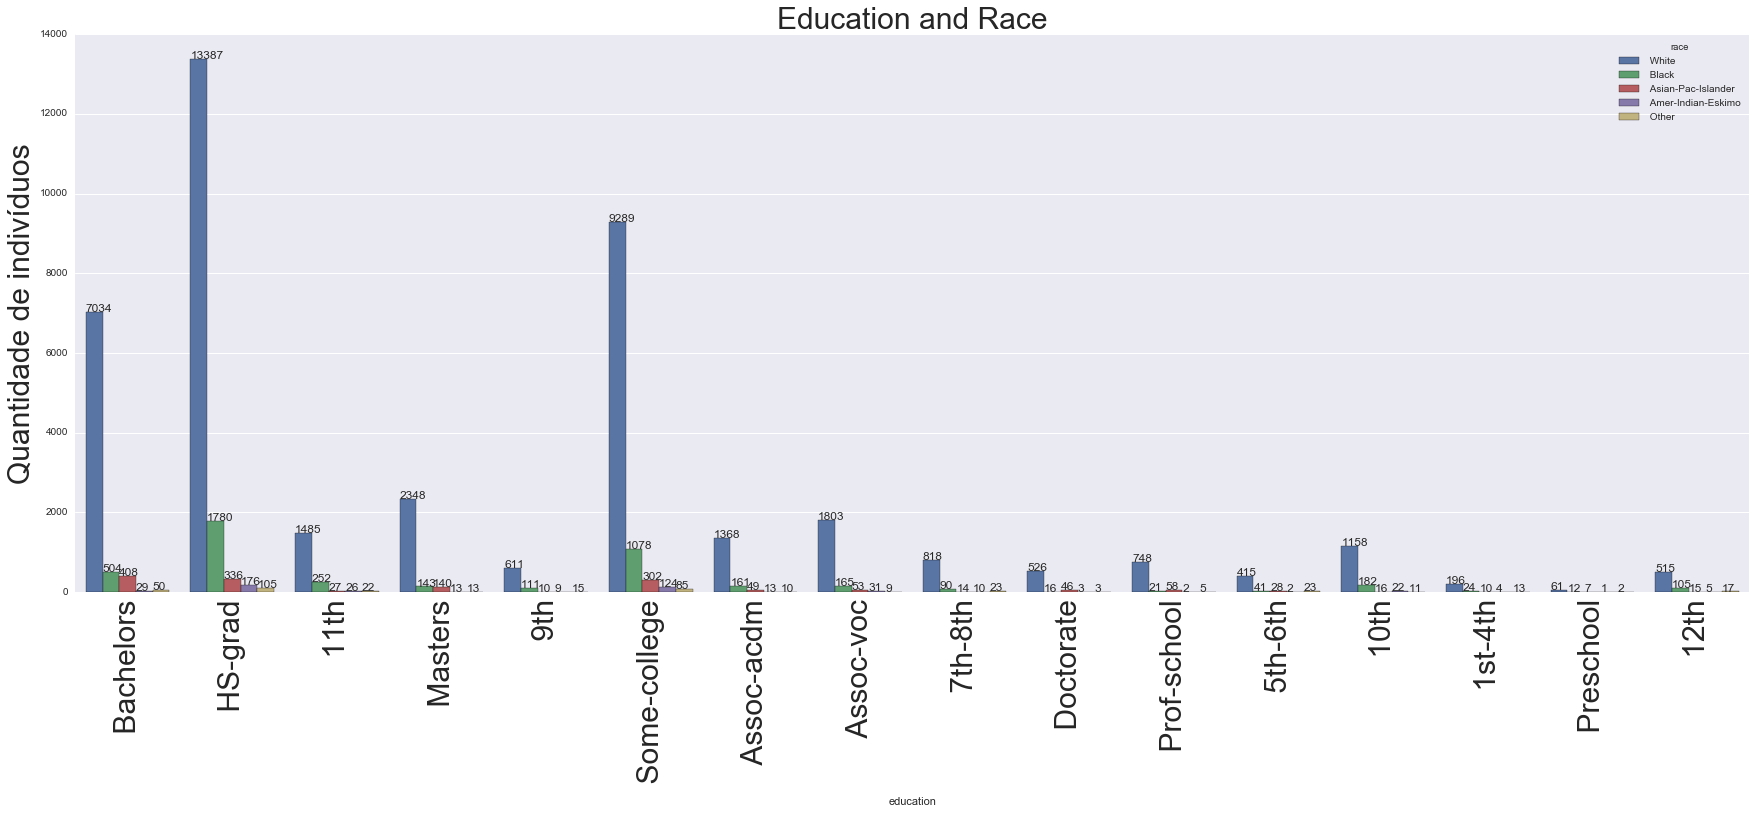

In [143]:
# Verificando a relação da feature Education e sexo 
plt.figure(figsize=(30,10))
ax = sns.countplot(x='education',hue='race',data=data)
plt.title('Education and Race',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

#### Marital-status

#### Occupation

#### Relationship

#### Race

In [153]:
data.race.replace(np.nan,'others')

0                      White
1                      White
2                      White
3                      Black
4                      Black
5                      White
6                      Black
7                      White
8                      White
9                      White
10                     Black
11        Asian-Pac-Islander
12                     White
13                     Black
14        Asian-Pac-Islander
15        Amer-Indian-Eskimo
16                     White
17                     White
18                     White
19                     White
20                     White
21                     Black
22                     Black
23                     White
24                     White
25                     White
26                     White
27        Asian-Pac-Islander
28                     White
29                     White
                ...         
48813                  White
48814                  White
48815                  White
48816         

ValueError: cannot convert float NaN to integer

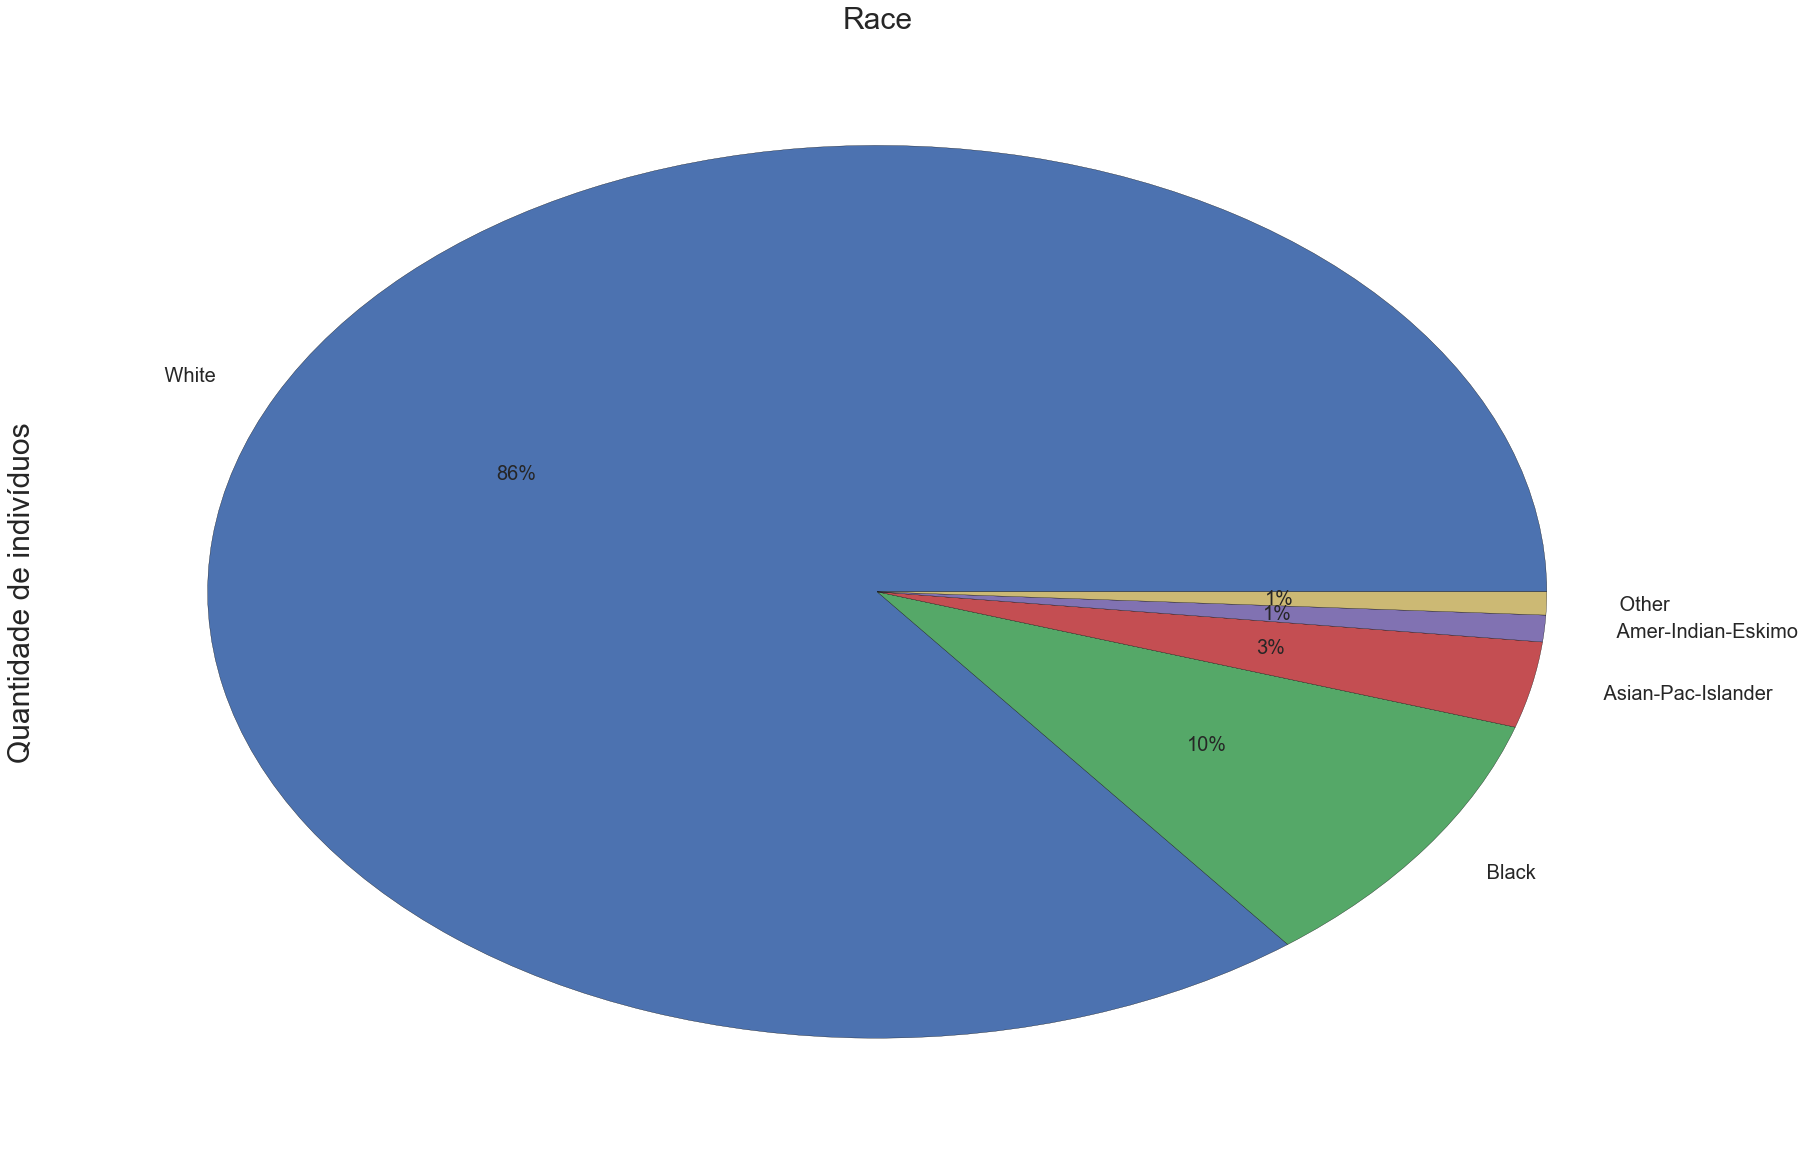

In [154]:
# Verificando a distribuição da feature education, utilizando Pizza plot
plt.figure(figsize=(30,20))
data.race.value_counts().plot.pie(autopct="%1.0f%%",fontsize=20)

plt.title('Race',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=25)
    
plt.show()

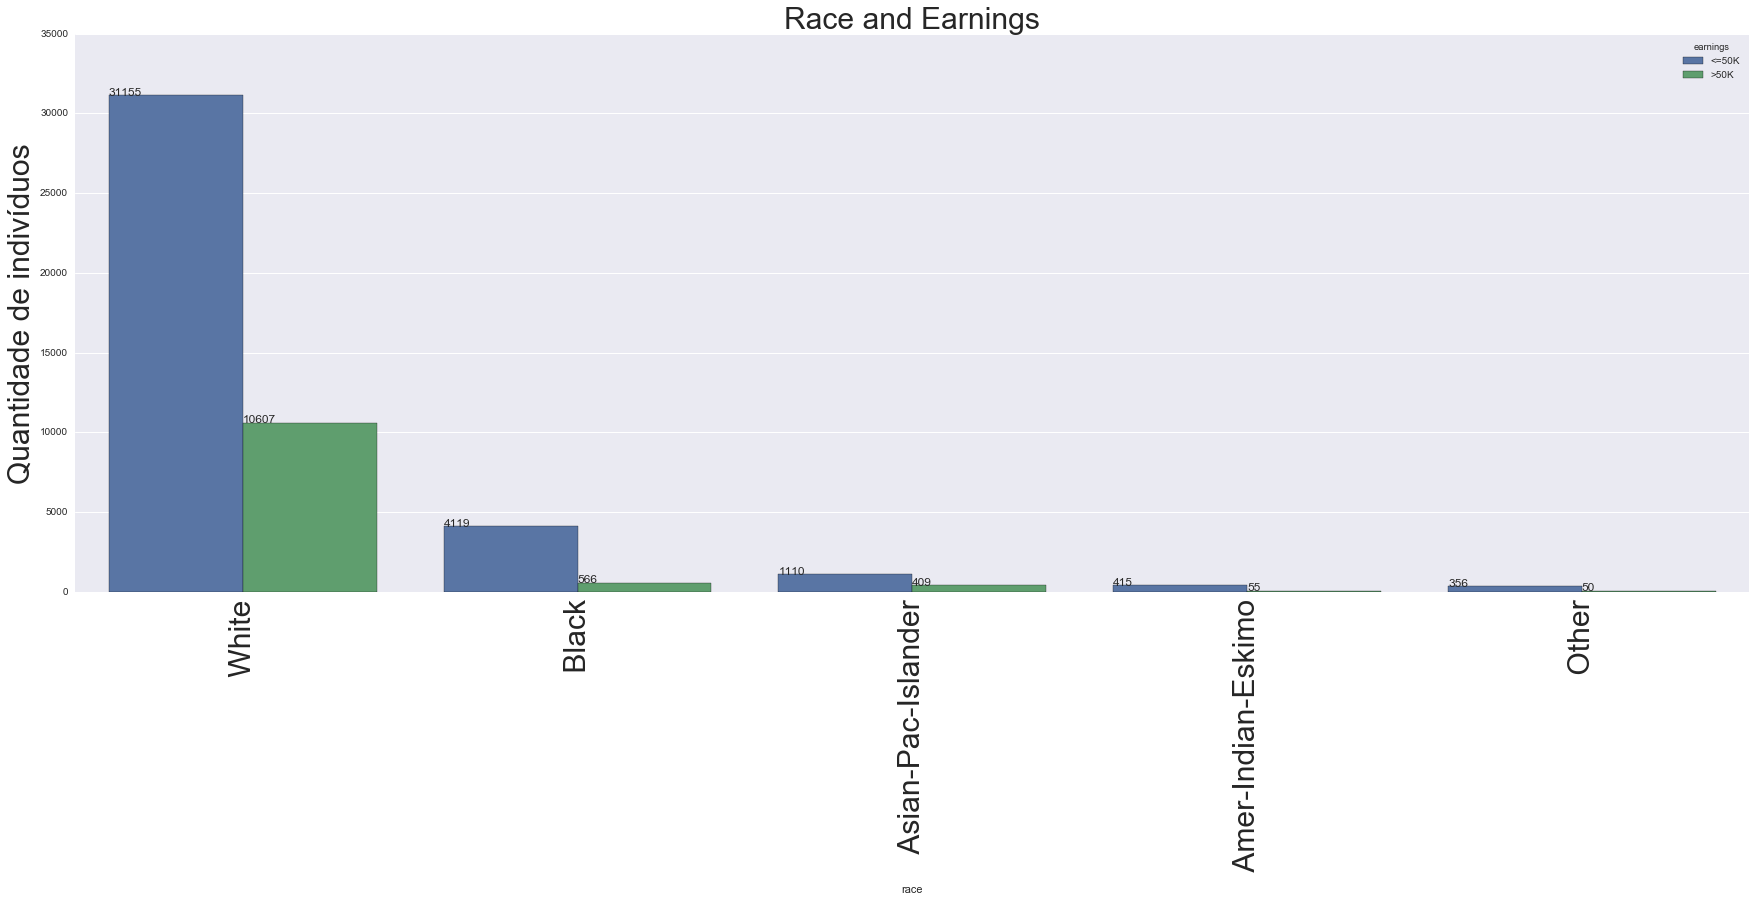

In [155]:
# Verificando a relação da raça e ganhos
plt.figure(figsize=(30,10))
ax = sns.countplot(x='race',hue='earnings',data=data)
plt.title('Race and Earnings',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

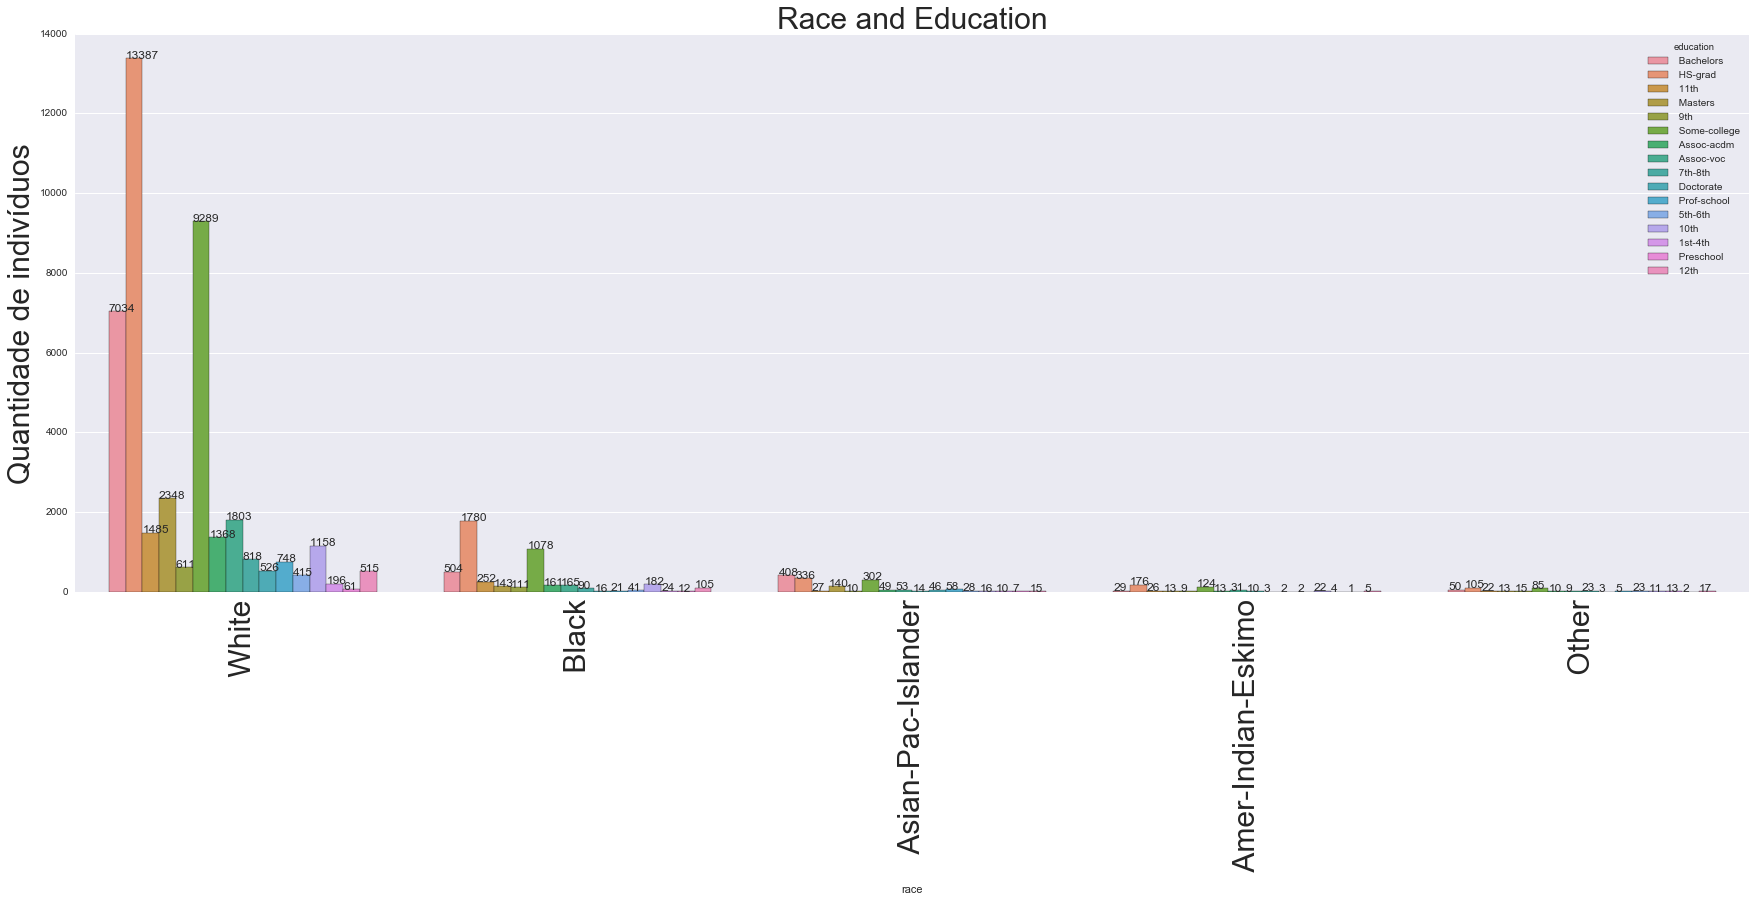

In [157]:
# Verificando a relação da raça e ganhos
plt.figure(figsize=(30,10))
ax = sns.countplot(x='race',hue='education',data=data)
plt.title('Race and Education',fontsize=30)
plt.ylabel('Quantidade de indivíduos',fontsize=30)
plt.xticks(rotation=90,fontsize=30)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height(), str(int(patch.get_height())),fontsize=12)

plt.show()

#### Sex

#### Capital-gain e Capital-loss

#### Native-country

### Relação entre os dados

In [220]:
categorical_features = list(data.select_dtypes(include=['object']).columns)
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'earnings']

In [219]:
continuous_features

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [189]:
continuous_features = list(data.select_dtypes(include=['float64']).columns)
data_cont = data[continuous_features]

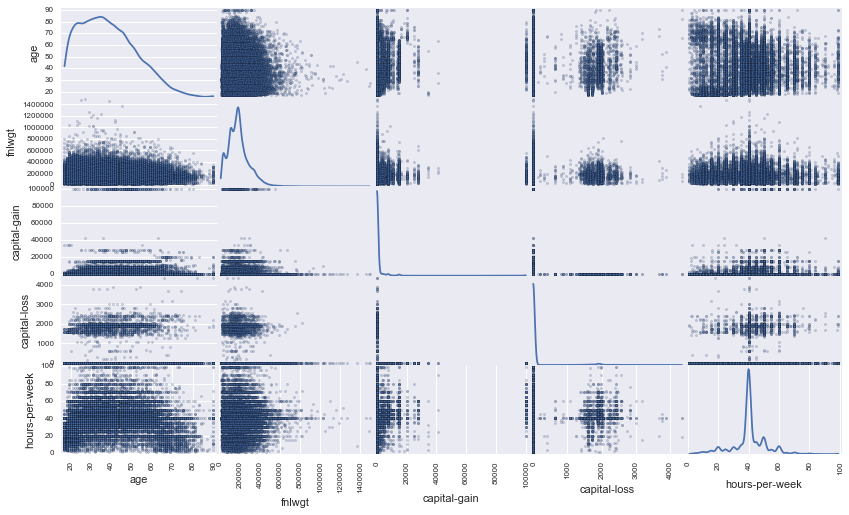

In [208]:
pd.scatter_matrix(data_cont, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

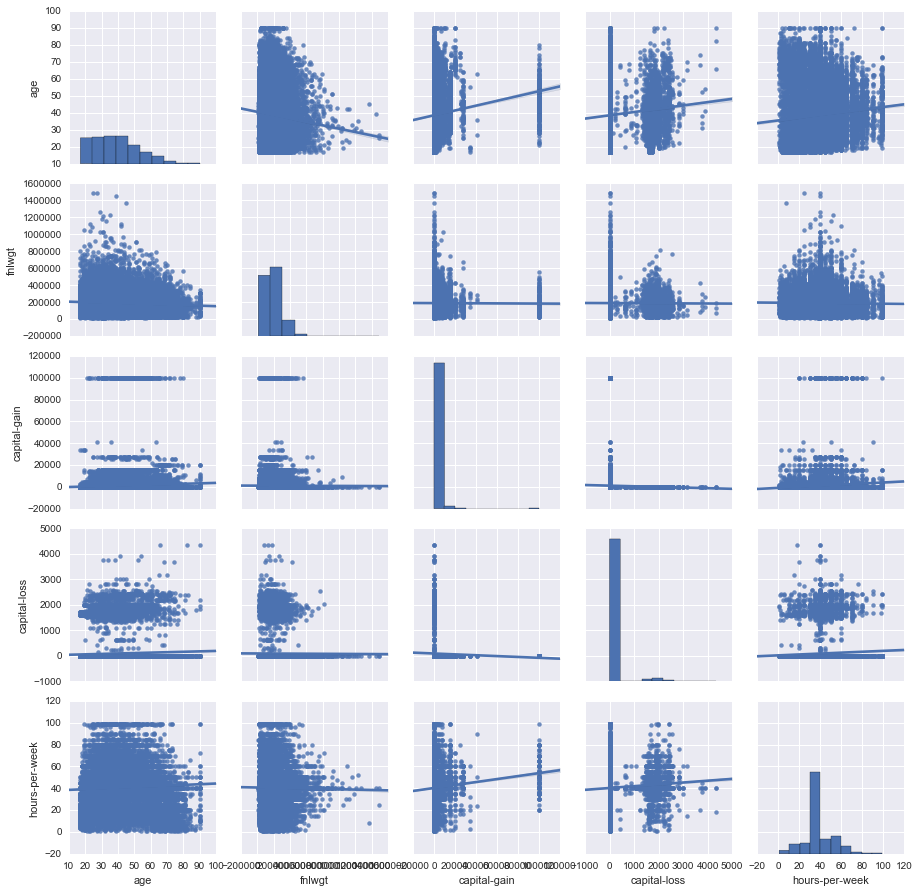

In [207]:
sns.pairplot(data_cont,kind='reg')
plt.show()

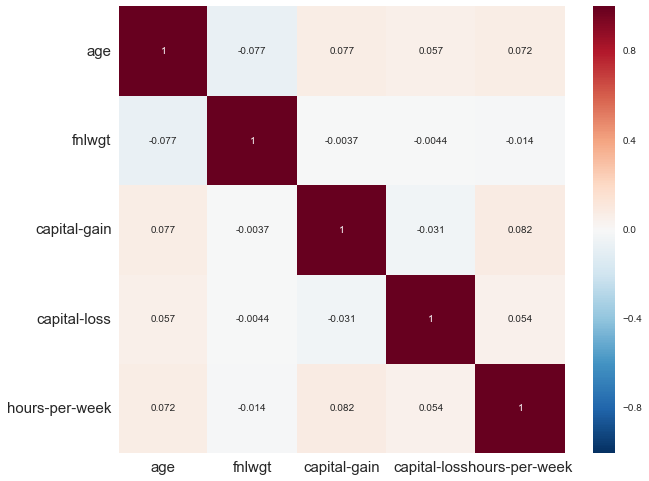

In [203]:
plt.figure(figsize=(10,8))
plt.yticks(rotation=90,fontsize=15)
plt.xticks(fontsize=15)
ax = sns.heatmap(data_cont.corr(),annot=True)
plt.show()

In [209]:
a = pd.crosstab(index=data.education, columns=data.earnings)

In [212]:
import scipy.stats as sps

chi2, pval, x,y = sps.chi2_contingency(a,correction=False)

In [217]:
chi2, pval, x

(6537.9729613609634, 0.0, 15)

In [218]:
len(data.education.unique())

16

In [234]:
b = pd.crosstab(index=data['education-num'], columns=data.education)
sps.chi2_contingency(b,correction=False)

(732629.99999999988,
 0.0,
 225,
 array([[  2.36040703e+00,   3.07923508e+00,   1.11647762e+00,
           4.19741206e-01,   8.64972769e-01,   1.62288604e+00,
           1.28471398e+00,   2.72067073e+00,   3.50237501e+00,
           1.36373408e+01,   1.00941812e+00,   2.68226526e+01,
           4.51519184e+00,   1.41046640e-01,   1.41726383e+00,
           1.84856067e+01],
        [  7.02434380e+00,   9.16350682e+00,   3.32252979e+00,
           1.24910937e+00,   2.57407559e+00,   4.82955243e+00,
           3.82318496e+00,   8.09645387e+00,   1.04227304e+01,
           4.05834118e+01,   3.00393104e+00,   7.98216289e+01,
           1.34367757e+01,   4.19741206e-01,   4.21764056e+00,
           5.50113836e+01],
        [  1.44752672e+01,   1.88835019e+01,   6.84683264e+00,
           2.57407559e+00,   5.30447156e+00,   9.95239753e+00,
           7.87854715e+00,   1.66845952e+01,   2.14784202e+01,
           8.36314033e+01,   6.19028705e+00,   1.64490725e+02,
           2.76895500e+01,   

#### Conjunto de treinamento

In [9]:
# Conjunto de treinamento
print('Quantidade de exemplos presentes no conjunto de treinamento: {}\nQuantidade de features presentes: {}'.format(*training_data.shape))

Quantidade de exemplos presentes no conjunto de treinamento: 32561
Quantidade de features presentes: 15


In [3]:
print('Quantidade de exemplos presentes no conjunto de treino: {}\nQuantidade de features presentes: {}'.format(*test_data.shape),end='\n')

Quantidade de exemplos presentes no conjunto de treinamento: 32561
Quantidade de features presentes: 15

Quantidade de exemplos presentes no conjunto de treino: 16282
Quantidade de features presentes: 15


Proporção de ganhos no conjunto de treinamento


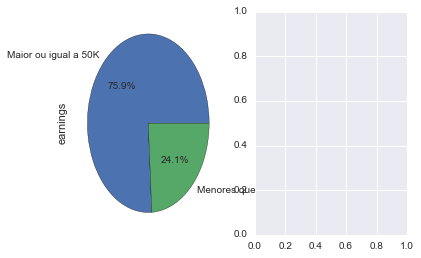

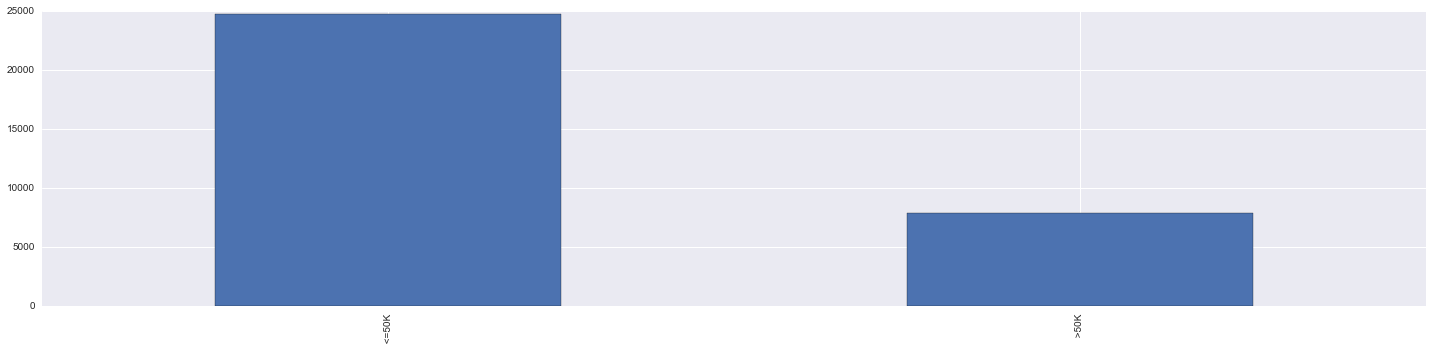

In [4]:
# Verificando a proporção de exemplos maiores que 50K e menores que 50K
print('Proporção de ganhos no conjunto de treinamento')

# Gráfico em pizza
ax1 = plt.subplot(121)
#plt.figure(figsize=(7,7))
training_data.earnings.value_counts().plot.pie(labels=['Maior ou igual a 50K','Menores que 50K'],autopct='%1.1f%%')

ax2 = plt.subplot(122)
plt.figure(figsize=(20,5))
training_data.earnings.value_counts().plot.bar()     

plt.tight_layout()
plt.show()

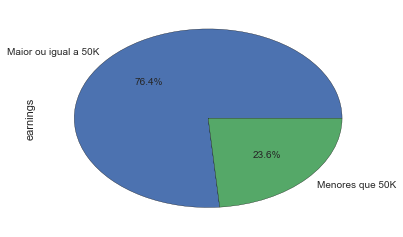

In [33]:
ax = test_data.earnings.value_counts().plot.pie(labels=['Maior ou igual a 50K','Menores que 50K'],autopct='%1.1f%%')

In [37]:
# Verificação de valores faltantes nas bases
x = training_data[training_data[]]

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
earnings          0
dtype: int64


#### Verificando os dados do conjunto de treinamento

In [2]:
# Verificando a base de treinamento 
print('Quantidade de exemplos presentes na base: {}\nQuantidade de features presentes na base: {}'.format(*training_data.shape))

Quantidade de exemplos presentes na base: 32561
Quantidade de features presentes na base: 15


In [14]:
# Exemplos da base
training_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Verificando os tipos de dados presentes
print('Tipos de dados presentes nas bases de dados:\n\n{}'.format(training_data.dtypes))

Tipos de dados presentes nas bases de dados:

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earnings          object
dtype: object


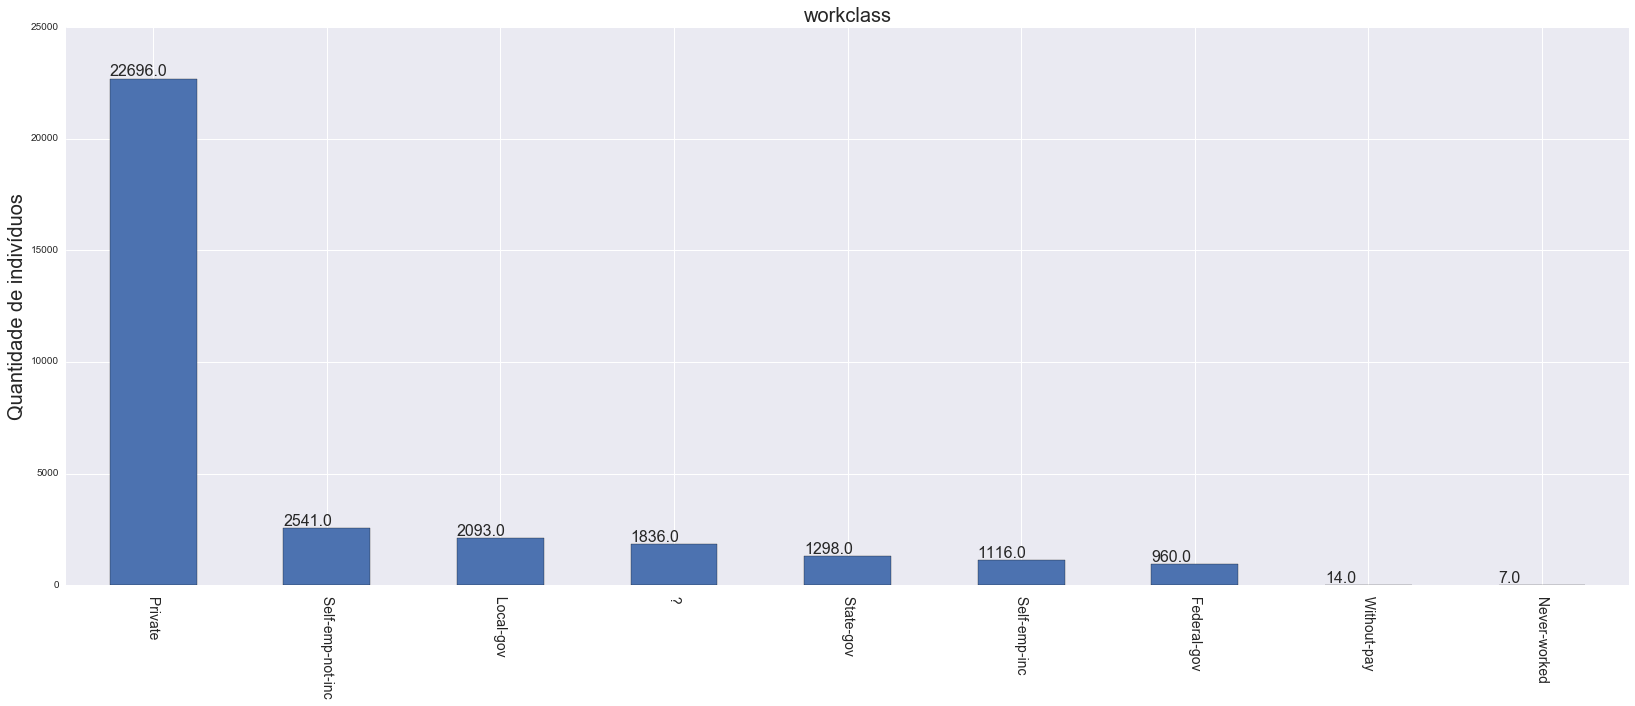

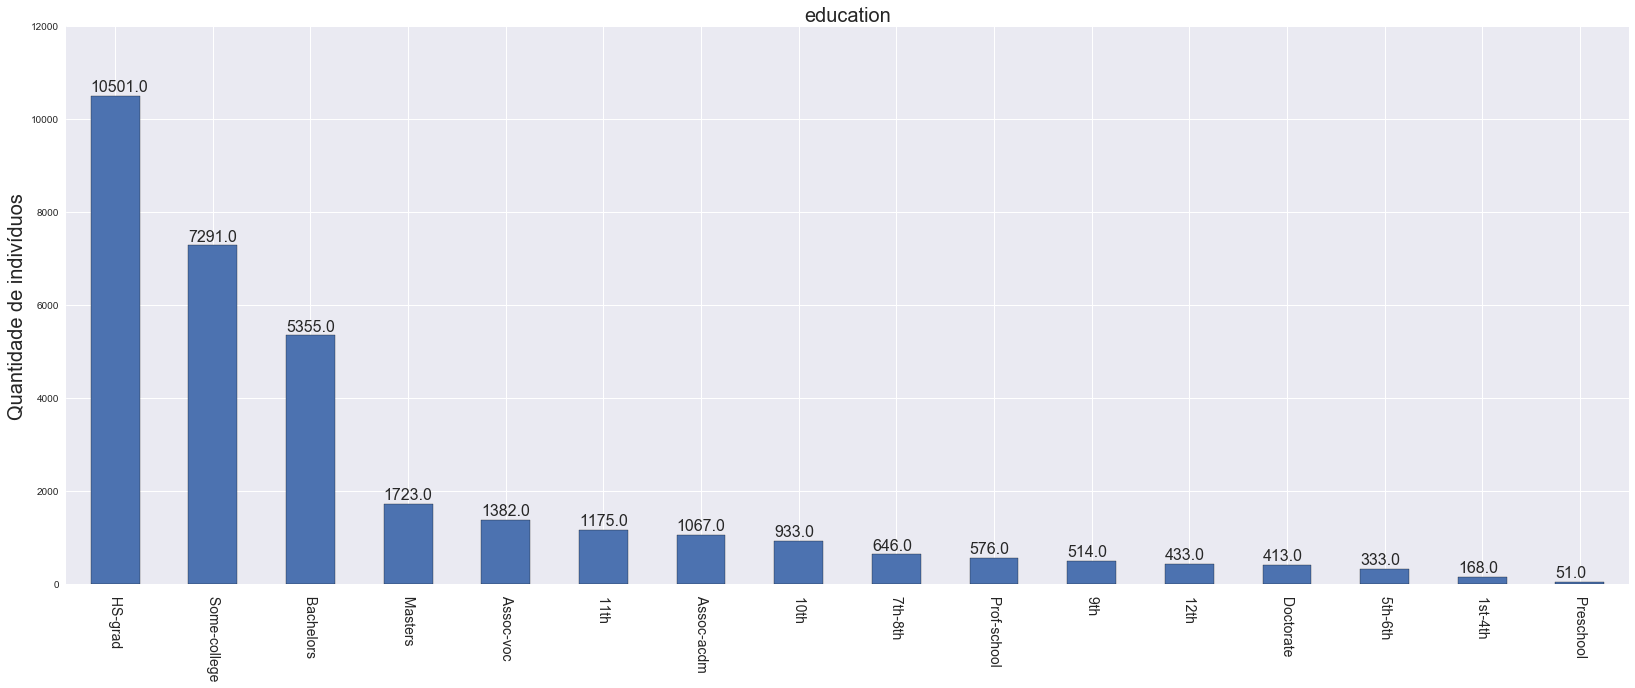

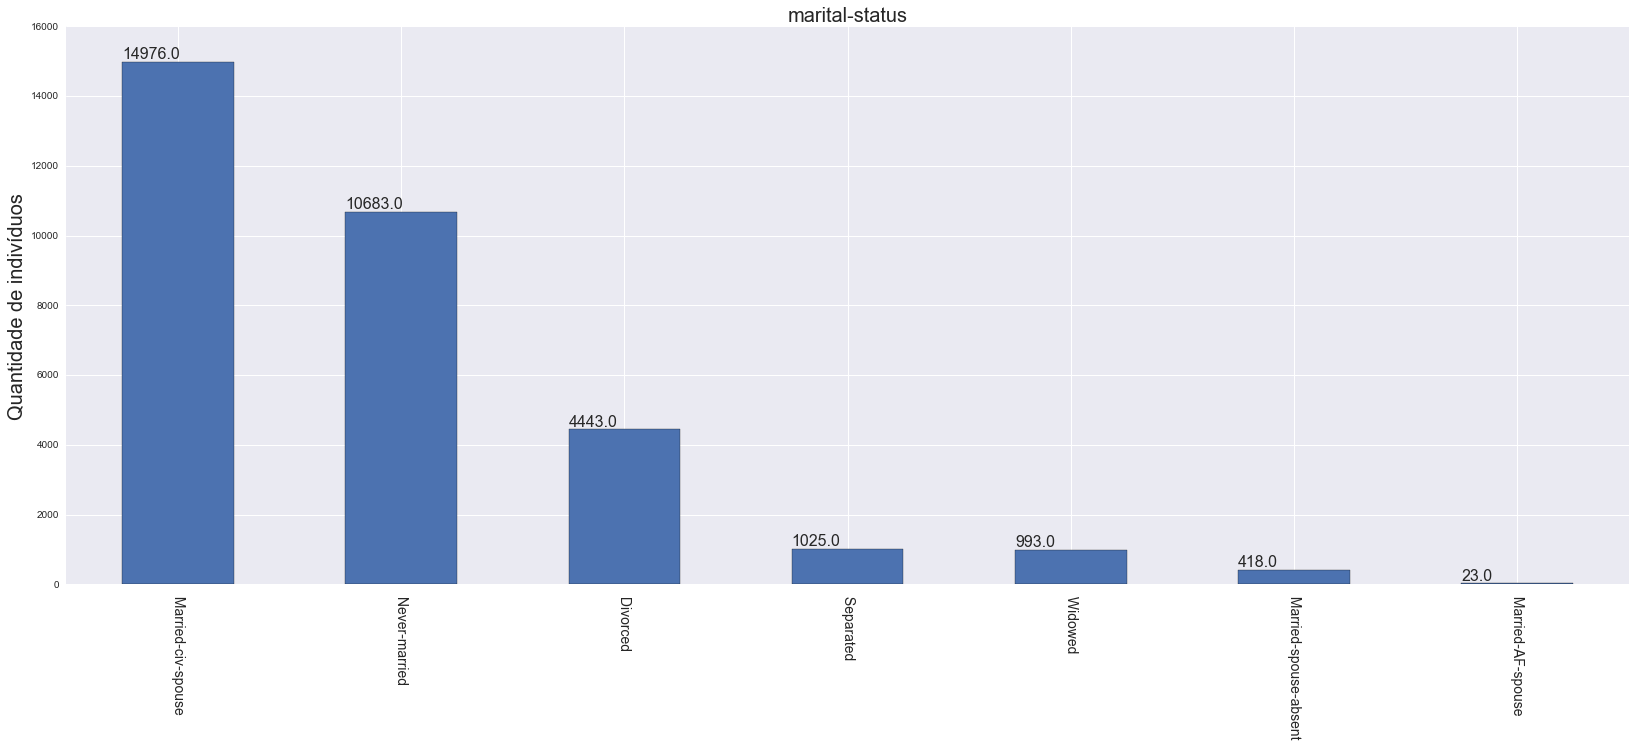

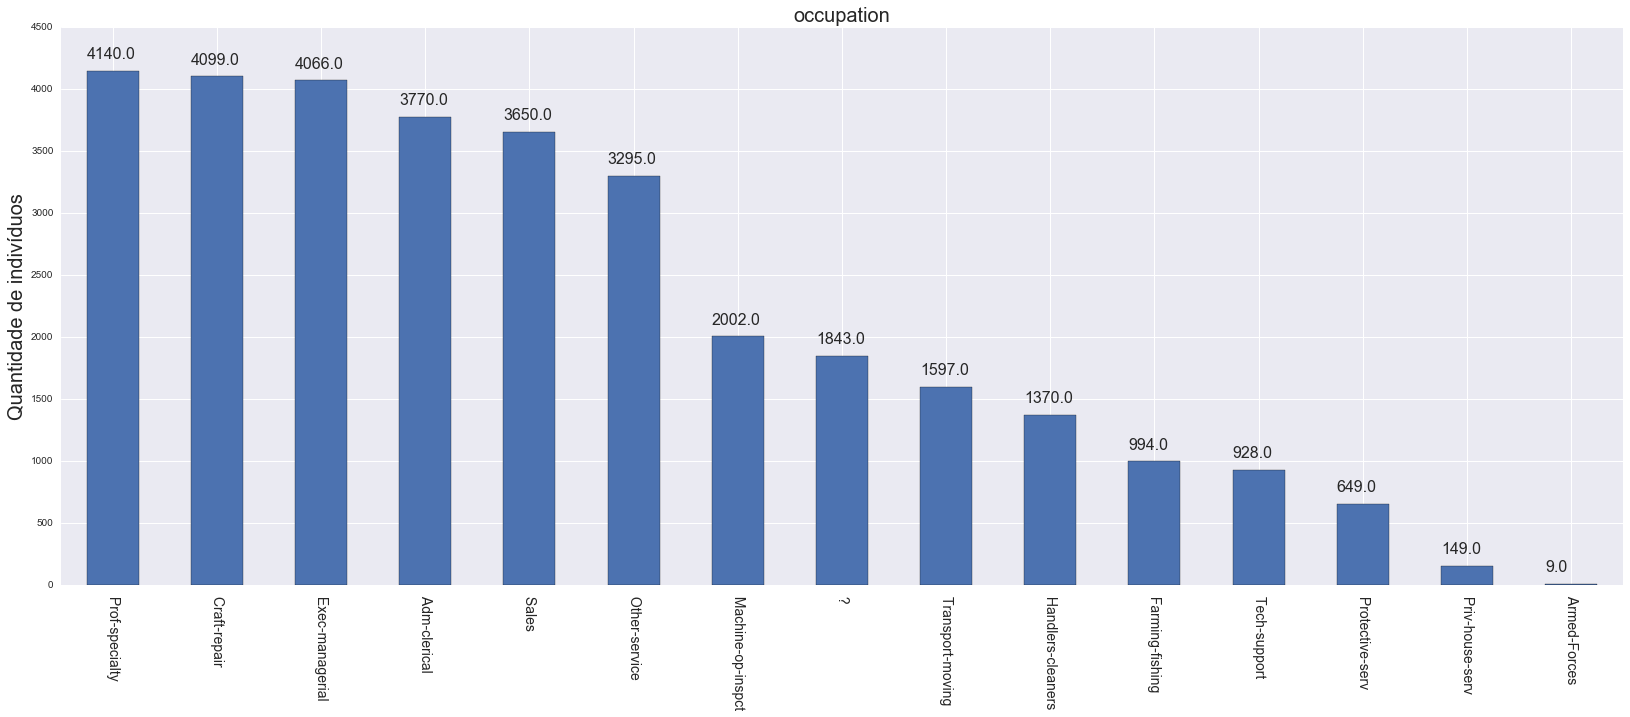

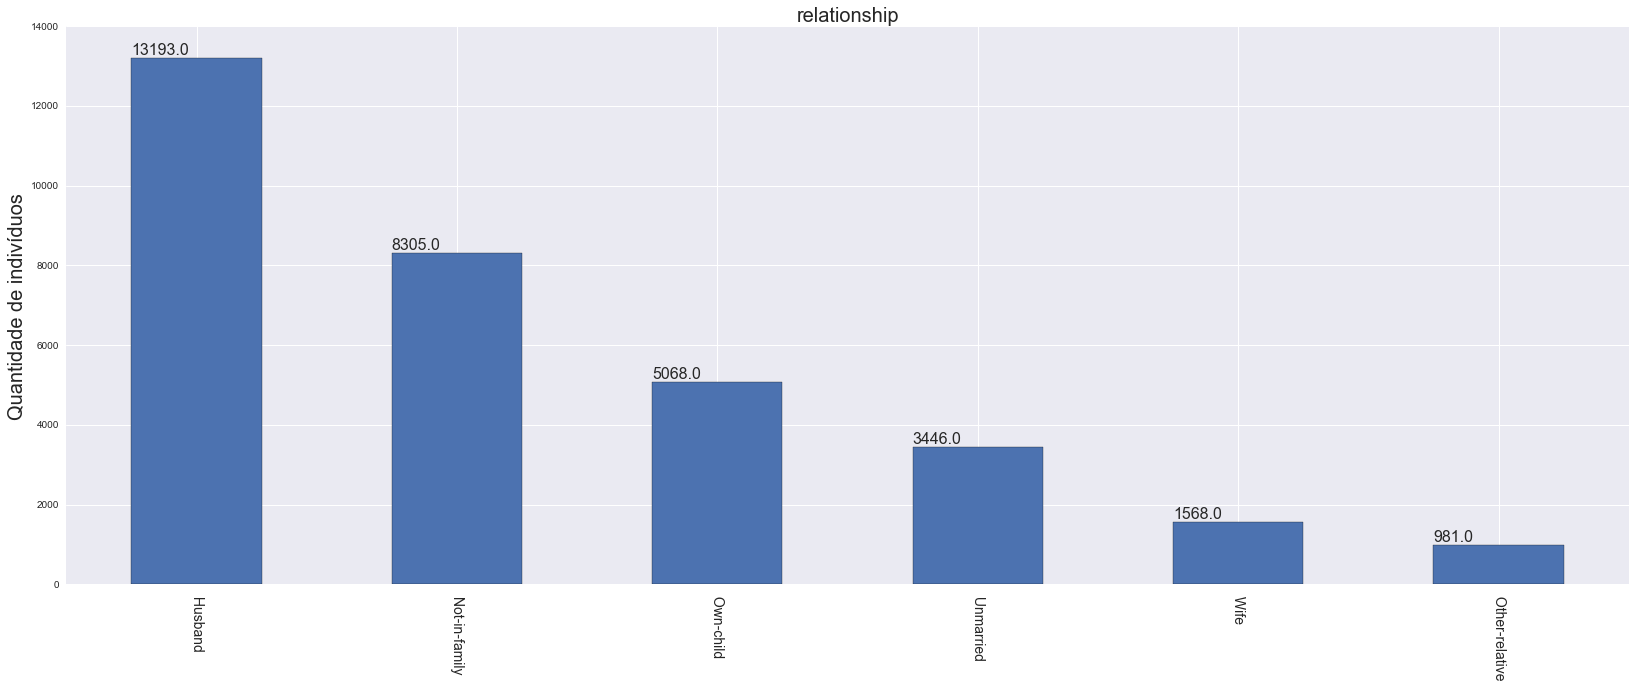

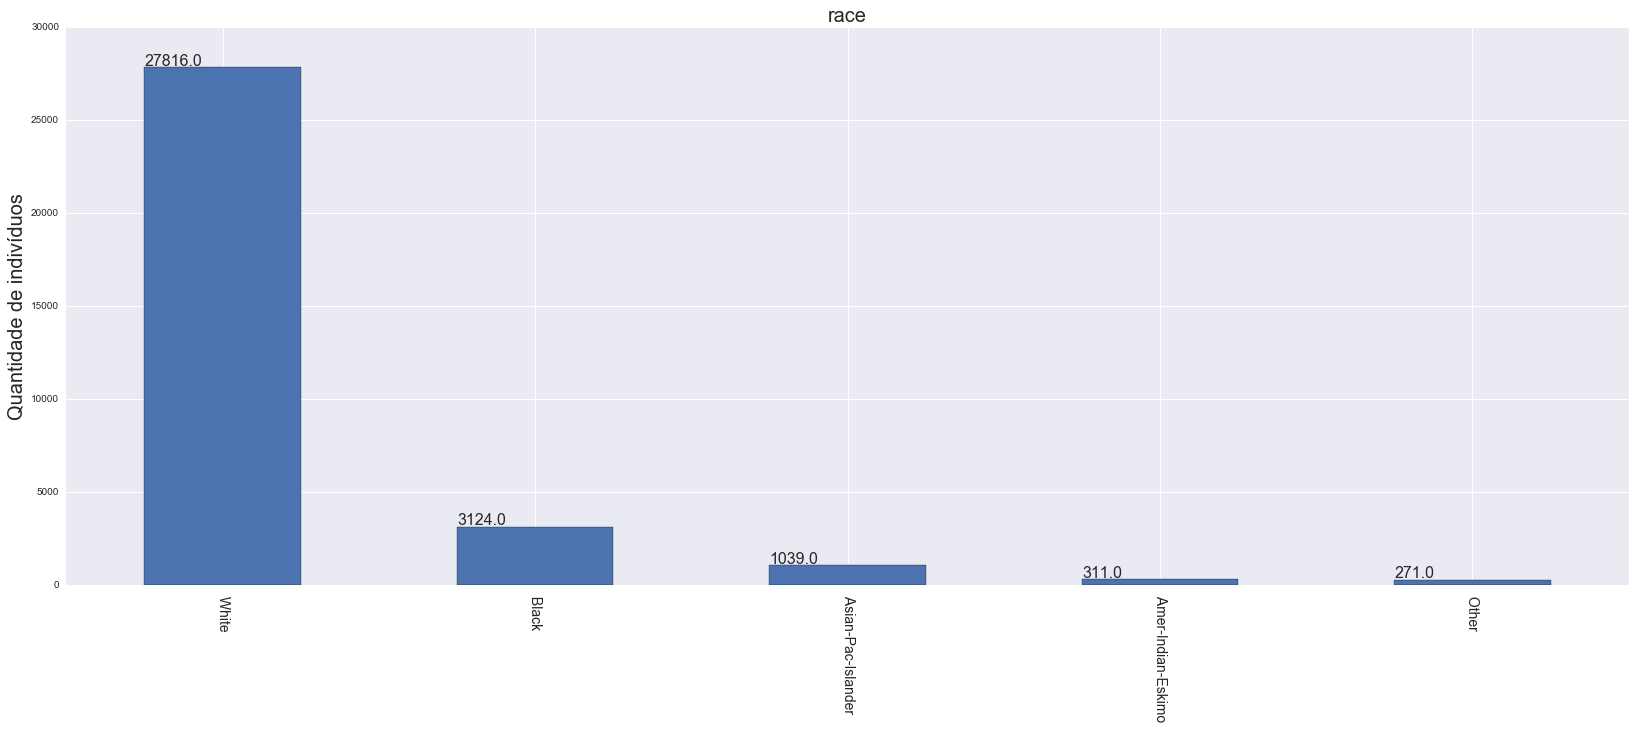

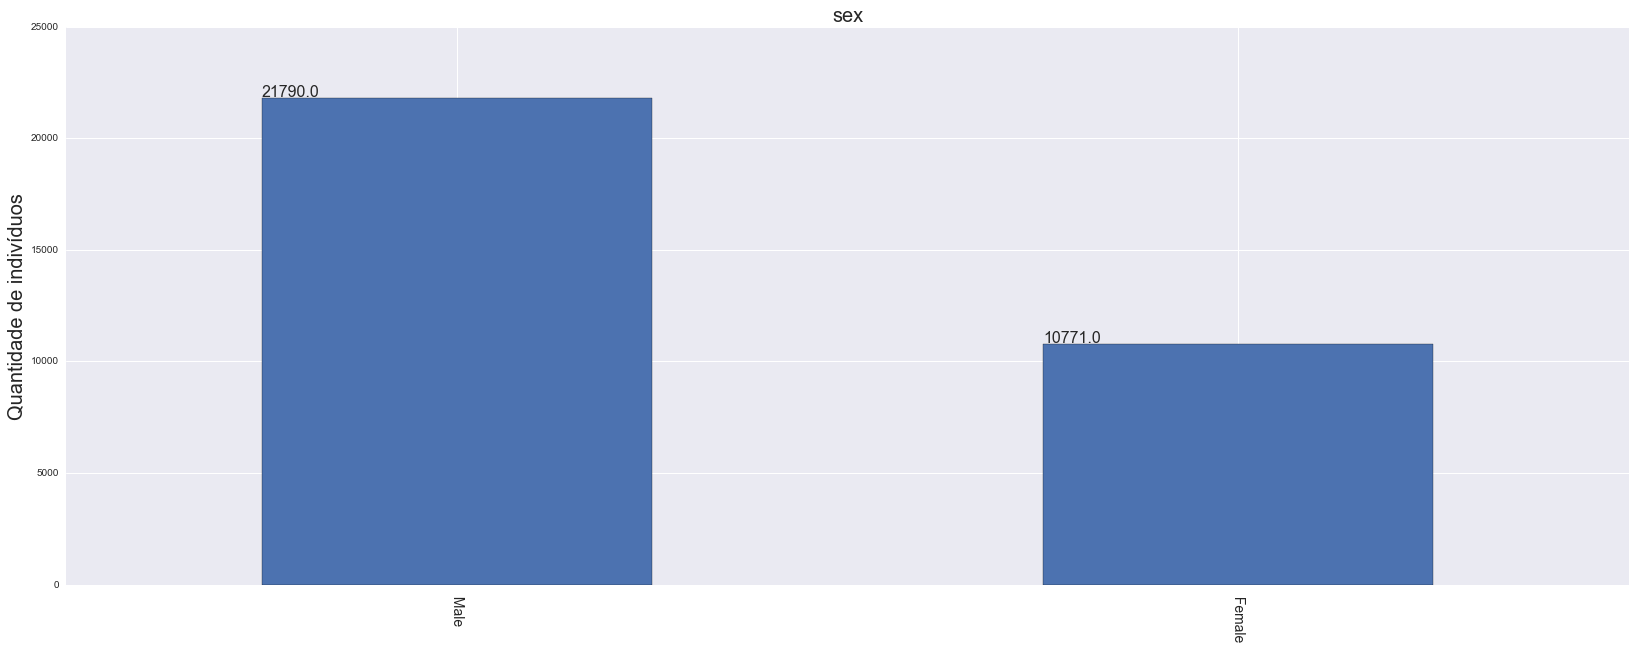

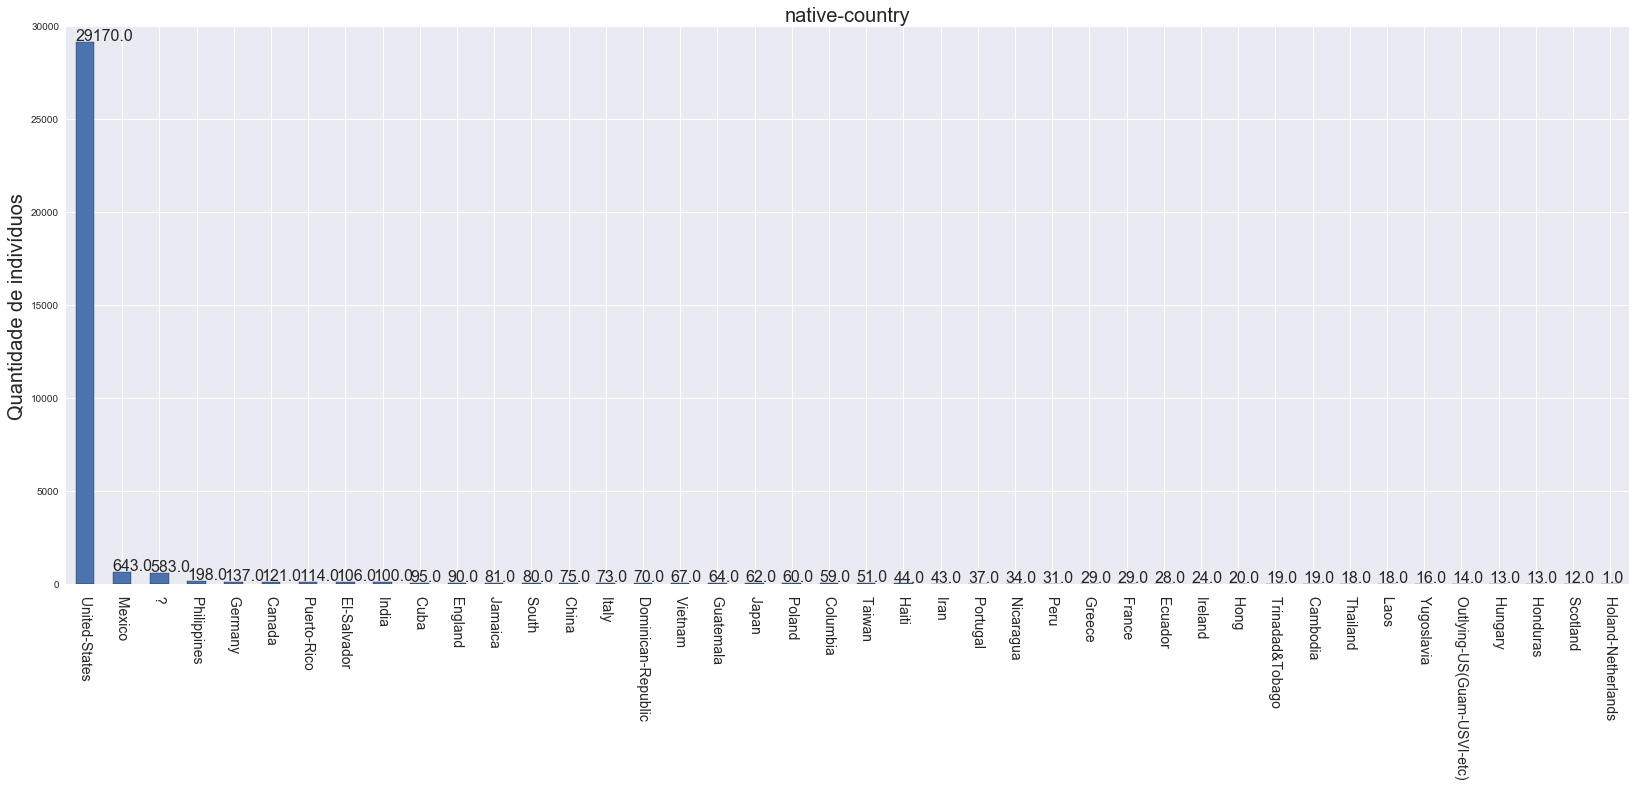

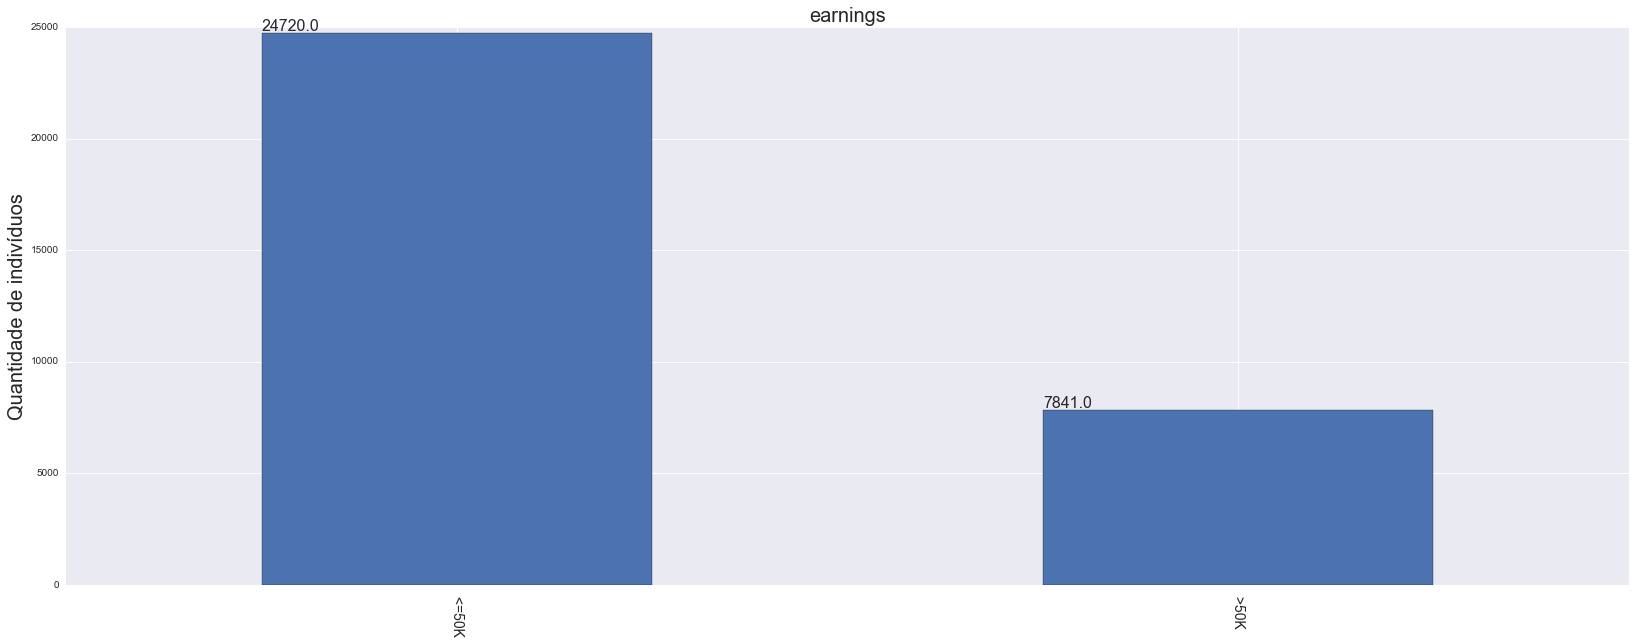

In [15]:
# Quais os possíveis valores para cada feature?
for feature in list(training_data.select_dtypes(include=['object']).columns):
    # Configuração dos plots
    plt.figure(figsize=(28,10))
    plt.title(feature,fontsize=20)
    plt.ylabel('Quantidade de indivíduos',fontsize=20)
    
    # Configurando os textos no gráfico
    ax = training_data_categorical[feature].value_counts().plot.bar()
    ax.set_alpha(0.8)
    
    for patch in ax.patches:
        ax.text(patch.get_x(), patch.get_height() + 100, str(patch.get_height()),fontsize=16)
        plt.xticks(rotation=-90,fontsize=14)

plt.show()

#### Análise das features numéricas

In [26]:
training_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### 2.2.1 Análise da feature <i>Age</i>

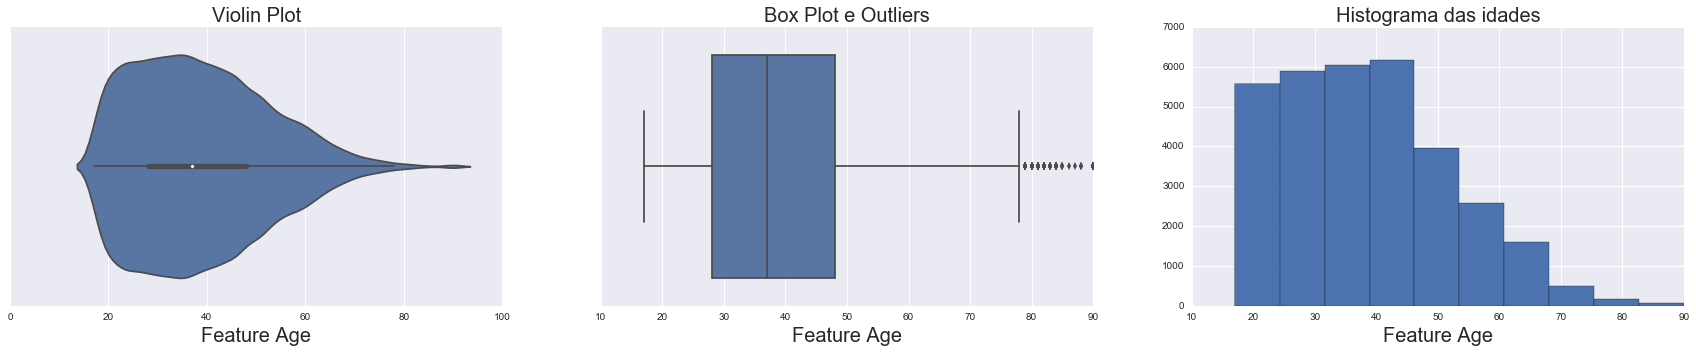

In [27]:
# Visualização da feature Age

# Configuração do estilo e tamanho das imagens
f, ax = plt.subplots(figsize=(30,5))
sns.set_style("darkgrid")

# Violin plot, interessante para saber a concentração dos dados
plt.subplot(131)
sns.violinplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Violin Plot',fontsize=20)

# Boxplot, para visualização dos outliers
plt.subplot(132)
sns.boxplot(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Box Plot e Outliers',fontsize=20)

# Histograma dos dados
plt.subplot(133)
plt.hist(training_data.age)
plt.xlabel('Feature Age',fontsize=20)
plt.title('Histograma das idades',fontsize=20)

plt.show()

In [10]:
# De acordo com o gráfico boxplot, existem outliers presentes. Verificando exemplos considerados outliers (acima de 75%)
# Definição dos quantis
Q1, Q3 = training_data.age.quantile(0.25), training_data.age.quantile(0.75)

# Definição de IQR de acordo com a teoria
IQR = Q3 - Q1

outliers = training_data[training_data.age > (Q3 + 1.5 * IQR)]
outliers.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,?,107762,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [11]:
# Um pouco mais sobre os outliers:
outliers.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,83.930070,160467.279720,9.517483,1281.363636,134.062937,28.223776
std,4.398544,88682.488827,3.469897,4283.654445,637.433567,16.975716
min,79.000000,20101.000000,2.000000,0.000000,0.000000,1.000000
25%,80.000000,97599.000000,9.000000,0.000000,0.000000,15.000000
50%,82.000000,147097.000000,9.000000,0.000000,0.000000,26.000000
75%,90.000000,201940.500000,13.000000,0.000000,0.000000,40.000000
max,90.000000,562336.000000,16.000000,20051.000000,4356.000000,99.000000


In [12]:
# Quantos outliers?
print('Quantidade de outliers: {}\nPorcentagem de outliers em relação aos dados:{:.4f}%'.format(outliers.shape[0],(outliers.shape[0]/training_data.shape[0])*100))

Quantidade de outliers: 143
Porcentagem de outliers em relação aos dados:0.4392%


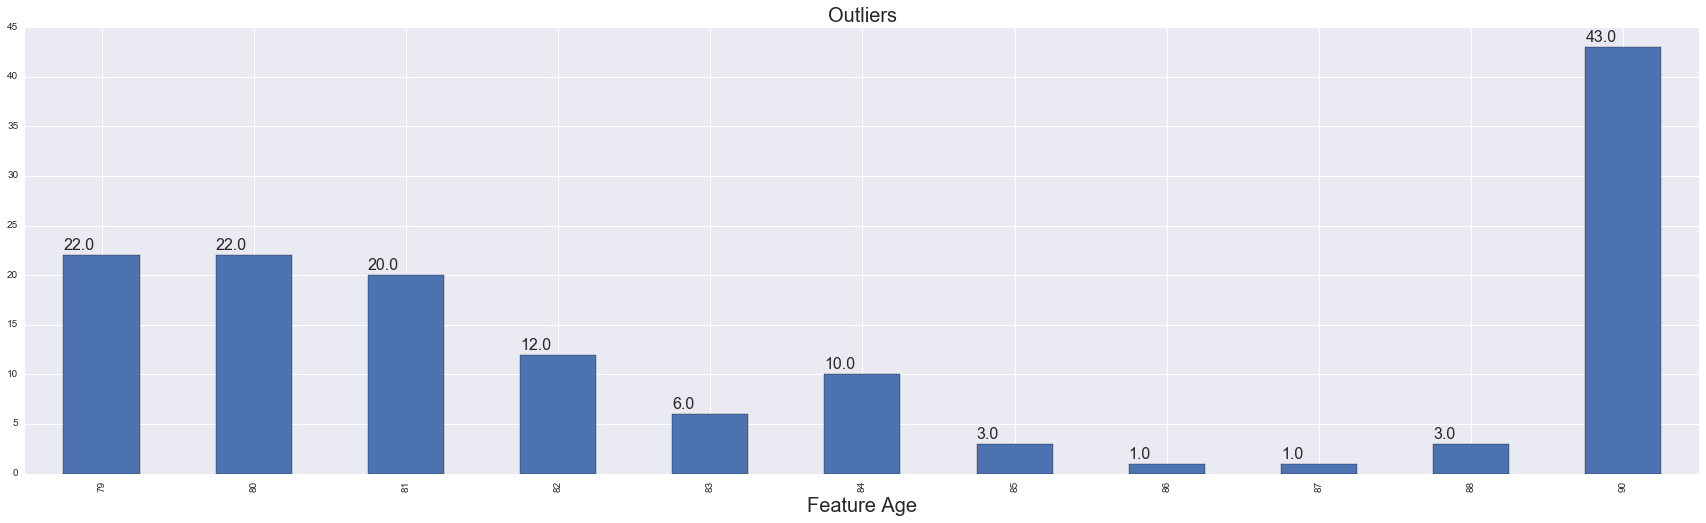

In [28]:
# Histograma dos outliers
plt.figure(figsize=(30,8))
sns.set_style("darkgrid")

# BoxPlot
ax = outliers.age.value_counts().sort_index().plot.bar()
plt.xlabel('Feature Age',fontsize=20)
plt.title('Outliers',fontsize=20)

for patch in ax.patches:
    ax.text(patch.get_x(), patch.get_height() + 0.5, str(patch.get_height()),fontsize=16)
    
plt.show()

In [67]:
a = pd.get_dummies(training_data_categorical.race)
a


,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0


## Referências Bibliográficas

[1] (Online) UCI Machine Learning Repository: Census Income Dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/Census+Income. Último acesso: 21/03/2018 às 00:22 horas.<br>

[2] (Online) UCI Machine Learning Repository: Census Income KDD. Disponível em https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD). Último acesso: 21/03/2018 às 01:30 horas.<br>

[3] (Online) Classifying Income data from Census 1994 Data. Disponível em https://cseweb.ucsd.edu/~jmcauley/cse190/reports/sp15/024.pdf. Último acesso: 21/03/2018 às 01:32 horas.<br>

[4] Ristanoski, Goce & Liu, Wei & Bailey, James. (2013). Discrimination aware classification for imbalanced datasets. International Conference on Information and Knowledge Management, Proceedings. 1529-1532. 10.1145/2505515.2507836.<br>

[5] Hunter, John D. "Matplotlib: A 2D graphics environment." Computing in science & engineering 9.3 (2007): 90-95.

[6] (Online) Esperança de vida. Disponível em https://pt.wikipedia.org/wiki/Esperan%C3%A7a_de_vida. Último acesso: 23/04/2018 às 16:05 horas.<br>

[7] (Online) Vital Statistics of the United States, 1994, Preprint of Volume II, Mortality, Part A, Section 6. https://www.cdc.gov/nchs/data/lifetables/life94_2.pdf. Último acesso: 23/04/2018 às 16:05 horas.<br>